In [1]:
import pandas as pd
import numpy as np
import json
from tqdm.notebook import tqdm
import os
import matplotlib.pyplot as plt
import pickle as pkl

# Construct the dataset

### Read the original data set

In [2]:
prefix = '/mounts/work/speranskaya/data'

In [868]:
## FB13k
dataset = 'FB15k-237'
new_name = 'FB13k-QAQ'
N = 1000

data = []
for i, name in enumerate(['train', 'valid', 'test']):
    data.append(pd.read_csv(sep="\t", filepath_or_buffer="{}/{}/{}.txt".format(prefix, dataset, name), 
                            header=None, names=['e1', 'rel', 'e2']))

In [6]:
## YAGO
dataset = 'YAGO3-10'
new_name = 'YAGO3-QAQ'
N = 1500

data = []
for i, name in enumerate(['train', 'valid', 'test']):
    data.append(pd.read_csv(sep="\t", filepath_or_buffer="{}/{}/{}.txt".format(prefix, dataset, name), 
                            header=None, names=['e1', 'rel', 'e2']))
    
for i, split in enumerate(data):
    data[i] = split.loc[split.rel != 'isAffiliatedTo']

In [23]:
## WN18RR
dataset = 'WN18RR'
new_name = 'WN18RR-QAQ'
N = 1500

data = []
for i, name in enumerate(['train', 'valid', 'test']):
    data.append(pd.read_csv(sep="\t", filepath_or_buffer="{}/{}/{}.txt".format(prefix, dataset, name), 
                            header=None, names=['e1', 'rel', 'e2']))

In [38]:
## umls
dataset = 'umls'
new_name = 'umls-QAQ'
N = 150

data = []
for i, name in enumerate(['train', 'valid', 'test']):
    data.append(pd.read_csv(sep="\t", filepath_or_buffer="{}/{}/{}.txt".format(prefix, dataset, name), 
                            header=None, names=['e1', 'rel', 'e2']))

In [388]:
## nations
dataset = 'nations'
new_name = 'nations-QAQ'
N = 10

data = []
for i, name in enumerate(['train', 'valid', 'test']):
    data.append(pd.read_csv(sep="\t", filepath_or_buffer="{}/{}/{}.txt".format(prefix, dataset, name), 
                            header=None, names=['e1', 'rel', 'e2']))

In [555]:
## kinship
dataset = 'kinship'
new_name = 'kinship-QAQ'
N = 20

data = []
for i, name in enumerate(['train', 'valid', 'test']):
    data.append(pd.read_csv(sep="\t", filepath_or_buffer="{}/{}/{}.txt".format(prefix, dataset, name), 
                            header=None, names=['e1', 'rel', 'e2']))

In [24]:
train = data[0].astype(str)
evalset = pd.concat(data[1:3]).astype(str)
len(train), len(evalset)

(86835, 6168)

In [25]:
entities = pd.concat((train.e1, train.e2, evalset.e1, evalset.e2)).unique()
len(entities)

40943

### Remove random entities

In [26]:
# sample entities to remove
seed = np.random.randint(1000000000)
print(seed)
np.random.seed(seed)

ent_removed = np.random.choice(entities, N, replace=False)
ent_removed[0]

603947553


'6769392'

In [27]:
# only to reproduce the published split
# ent_removed = ['/m/0m_v0', '/m/04svwx', '/m/02rgz4', '/m/0295sy', '/m/0fnpj', '/m/0zchj', '/m/08pgl8', '/m/09th87', '/m/07y9ts', '/m/01drsx', '/m/02jm9c', '/m/095zlp', '/m/015c2f', '/m/02flpc', '/m/02vg0', '/m/0cq8qq', '/m/0d0kn', '/m/02qwg', '/m/0pgm3', '/m/04bfg', '/m/0bth54', '/m/018mmw', '/m/0738y5', '/m/0jn38', '/m/019n9w', '/m/05dxl_', '/m/0f4yh', '/m/0kq39', '/m/0k6yt1', '/m/06wbm8q', '/m/01b_d4', '/m/03339m', '/m/0frq6', '/m/0fvf9q', '/m/02qy3py', '/m/0jqj5', '/m/0h3vhfb', '/m/0c55fj', '/m/04_1l0v', '/m/04p3w', '/m/0241jw', '/m/01shy7', '/m/06y9c2', '/m/04jbyg', '/m/0h63q6t', '/m/0jm3b', '/m/03177r', '/m/01c7p_', '/m/01cm8w', '/m/064vjs', '/m/0465_', '/m/03m6j', '/m/01f62', '/m/02rn00y', '/m/055c8', '/m/01bcwk', '/m/01l8t8', '/m/01svq8', '/m/0d1yn', '/m/056zf9', '/m/027j9wd', '/m/0257w4', '/m/02_cx_', '/m/02pv_d', '/m/0bpbhm', '/m/03czz87', '/m/0c00zd0', '/m/0gs5q', '/m/0fs9vc', '/m/07gql', '/m/035wq7', '/m/01qcx_', '/m/013x0b', '/m/02g9p4', '/m/0c0nhgv', '/m/09mq4m', '/m/050gkf', '/m/0fkx3', '/m/01qb5d', '/m/07ylj', '/m/03qy3l', '/m/035rnz', '/m/01n6c', '/m/04zl8', '/m/02t0n9', '/m/027bs_2', '/m/07jnt', '/m/018d6l', '/m/01tm2s', '/m/03f4w4', '/m/02zd460', '/m/0j86l', '/m/01zpmq', '/m/06rny', '/m/01mqnr', '/m/07g_0c', '/m/0152n0', '/m/01d_h8', '/m/0329qp', '/m/0b82vw', '/m/0gvstc3', '/m/0cl0bk', '/m/0f4l5', '/m/0c_md_', '/m/03205_', '/m/01sxdy', '/m/026y3cf', '/m/01cyd5', '/m/01qx13', '/m/04bbb8', '/m/0jmh7', '/m/01xcgf', '/m/06j6l', '/m/02wb6yq', '/m/0dq3c', '/m/01v3x8', '/m/05m63c', '/m/0c7f7', '/m/026h21_', '/m/05pcjw', '/m/02l840', '/m/035nm', '/m/03h_fk5', '/m/01zkhk', '/m/0bxg3', '/m/03lvyj', '/m/06rqw', '/m/09d6p2', '/m/07brj', '/m/0djywgn', '/m/03qkcn9', '/m/02dlfh', '/m/0fcyj', '/m/0fqy4p', '/m/04y5j64', '/m/0159h6', '/m/07wrz', '/m/0999q', '/m/05b2gsm', '/m/0jf1b', '/m/022s1m', '/m/0yshw', '/m/03c0t9', '/m/0d9z_y', '/m/0gqmvn', '/m/06688p', '/m/01t21q', '/m/05t0zfv', '/m/0cs134', '/m/02zyq6', '/m/0g57ws5', '/m/03bdv', '/m/01kwlwp', '/m/09v42sf', '/m/0l2v0', '/m/01qn7n', '/m/0nvvw', '/m/059dn', '/m/0dm00', '/m/05qhw', '/m/01g4yw', '/m/02s4l6', '/m/0303jw', '/m/01v8y9', '/m/02r22gf', '/m/0dgq80b', '/m/0gmcwlb', '/m/077rj', '/m/010bnr', '/m/01y06y', '/m/05hqv', '/m/01jllg1', '/m/03mstc', '/m/0fmyd', '/m/0hr6lkl', '/m/01vtmw6', '/m/07lnk', '/m/0cmdwwg', '/m/01sqd7', '/m/02ktrs', '/m/0lgsq', '/m/06lj1m', '/m/01gbcf', '/m/05sbv3', '/m/0418ft', '/m/09n4nb', '/m/01q24l', '/m/03r0g9', '/m/07f7jp', '/m/0141kz', '/m/0h08p', '/m/0g133', '/m/080v2', '/m/0l0wv', '/m/03qh03g', '/m/0fv4v', '/m/02t8gf', '/m/051ls', '/m/0gkkf', '/m/0jnkr', '/m/0187x8', '/m/02s_qz', '/m/05jrj4', '/m/0lkm', '/m/0br1w', '/m/0140t7', '/m/01sn3', '/m/02f46y', '/m/07l2m', '/m/03wnh', '/m/0b1q7c', '/m/042gr4', '/m/0gj8t_b', '/m/03cwqpm', '/m/0r3tb', '/m/01k3tq', '/m/01xl5', '/m/037gjc', '/m/0m8vm', '/m/060pl5', '/m/01x6v6', '/m/03z5xd', '/m/025t7ly', '/m/01xzb6', '/m/04chyn', '/m/01pt5w', '/m/0nk72', '/m/0gkr9q', '/m/0ygbf', '/m/01cbwl', '/m/01f6x7', '/m/03by7wc', '/m/02n4kr', '/m/06n8j', '/m/029pnn', '/m/06mr6', '/m/0432_5', '/m/05zvq6g', '/m/041jk9', '/m/0c57yj', '/m/0c8wxp', '/m/015ynm', '/m/07_fj54', '/m/034qt_', '/m/0g7pm1', '/m/0781g', '/m/053yx', '/m/015zql', '/m/0trv', '/m/0127gn', '/m/0n5j_', '/m/03gyvwg', '/m/02665kn', '/m/01rgcg', '/m/01c9x', '/m/0170yd', '/m/04fcjt', '/m/01l7cxq', '/m/027rqbx', '/m/0343h', '/m/040j2_', '/m/0gvrws1', '/m/02g5bf', '/m/05cwl_', '/m/0fvppk', '/m/02gvwz', '/m/0f_y9', '/m/05r5w', '/m/07qv_', '/m/0h2zvzr', '/m/05q9g1', '/m/0340hj', '/m/04qb6g', '/m/09pjnd', '/m/027y_', '/m/015hr', '/m/029bkp', '/m/07cz2', '/m/05k17c', '/m/06gd4', '/m/015pvh', '/m/0k_p5', '/m/03nymk', '/m/0j06n', '/m/01wmxfs', '/m/024dzn', '/m/02p76f9', '/m/09hnb', '/m/01swmr', '/m/04mky3', '/m/01pq4w', '/m/0p_47', '/m/019lxm', '/m/01vb6z', '/m/0gd5z', '/m/0n83s', '/m/02237m', '/m/0fs_s', '/m/011hq1', '/m/012v1t', '/m/01my4f', '/m/011v3', '/m/01xbp7', '/m/05drr9', '/m/03f_jk', '/m/0f0qfz', '/m/0d8_wz', '/m/02b0yk', '/m/02bqxb', '/m/0l3kx', '/m/01grrf', '/m/031rq5', '/m/0crh5_f', '/m/0ycht', '/m/0123_x', '/m/0222qb', '/m/01cf5', '/m/0jryt', '/m/02w7gg', '/m/0bwgc_', '/m/07ym0', '/m/02wtp6', '/m/0gz6b6g', '/m/01gst_', '/m/03_f0', '/m/07zlqp', '/m/01xhh5', '/m/019c57', '/m/0872p_c', '/m/084z0w', '/m/05fyy5', '/m/015zyd', '/m/0mfj2', '/m/03czrpj', '/m/02ppg1r', '/m/03qcq', '/m/01qg7c', '/m/044pqn', '/m/026p4q7', '/m/06wkj0', '/m/06y_n', '/m/061v5m', '/m/09rvcvl', '/m/06pjs', '/m/018y81', '/m/0c9l1', '/m/05qc_', '/m/059x66', '/m/0dk0dj', '/m/070w7s', '/m/09l3p', '/m/0443c', '/m/05c6073', '/m/0lfyx', '/m/039bp', '/m/0m3gy', '/m/0p4wb', '/m/01wdcxk', '/m/015bpl', '/m/01c0cc', '/m/027qq9b', '/m/01grpc', '/m/02qjb_', '/m/06dkzt', '/m/01c6l', '/m/0hv8w', '/m/02jxmr', '/m/02f8lw', '/m/01f6zc', '/m/0gd92', '/m/071_8', '/m/01qqwp9', '/m/0frsw', '/m/0mnm2', '/m/05qbbfb', '/m/059x3p', '/m/03kbr', '/m/038rzr', '/m/02d6n_', '/m/09x8ms', '/m/06cmp', '/m/05fg2', '/m/080dyk', '/m/0c38gj', '/m/0bmnm', '/m/0534nr', '/m/01p2b_', '/m/0czhv7', '/m/07t_x', '/m/08jcfy', '/m/01lrrt', '/m/041288', '/m/09qr6', '/m/09gkdln', '/m/024dw0', '/m/0htlr', '/m/01kr6k', '/m/01vl17', '/m/02lkcc', '/m/01yc02', '/m/04m8fy', '/m/01hbq0', '/m/0fdv3', '/m/01pv91', '/m/026kqs9', '/m/05p8bf9', '/m/07hhnl', '/m/02qwzkm', '/m/05l5n', '/m/034np8', '/m/0tfc', '/m/0g39h', '/m/0fsv2', '/m/0dbb3', '/m/037w7r', '/m/01hxs4', '/m/02l7c8', '/m/02_286', '/m/02h22', '/m/02mxbd', '/m/0p7pw', '/m/0fd3y', '/m/0frnff', '/m/03mbdx_', '/m/01242_', '/m/02jr26', '/m/02xgdv', '/m/03m5y9p', '/m/071h5c', '/m/011yxy', '/m/03bxp5', '/m/04l58n', '/m/073h5b', '/m/07h76', '/m/03v52f', '/m/0b4rf3', '/m/05xpms', '/m/06nsb9', '/m/022qqh', '/m/0167v', '/m/0tr3p', '/m/01ljpm', '/m/0gtvpkw', '/m/04t2t', '/m/02482c', '/m/01x5fb', '/m/02bfxb', '/m/08htt0', '/m/03y0pn', '/m/05sy0cv', '/m/01g63y', '/m/073tm9', '/m/01_j71', '/m/05q5t0b', '/m/0mfc0', '/m/01qszl', '/m/0436zq', '/m/01j8yr', '/m/01jdpf', '/m/01hp5', '/m/09p3_s', '/m/01f7v_', '/m/019lwb', '/m/0284gc', '/m/01tvz5j', '/m/0fg6k', '/m/0flddp', '/m/09889g', '/m/015np0', '/m/0nh57', '/m/01336l', '/m/0kst7v', '/m/01hd99', '/m/0g2mbn', '/m/019lty', '/m/02q0k7v', '/m/01y8cr', '/m/03b_fm5', '/m/064nh4k', '/m/017vb_', '/m/02k6hp', '/m/02bv9', '/m/014vm4', '/m/05gqf', '/m/0n2k5', '/m/04b19t', '/m/0lzkm', '/m/01jq34', '/m/0fztbq', '/m/0806vbn', '/m/0mpfn', '/m/064p92m', '/m/025569', '/m/0f4vx', '/m/05vtw', '/m/04h07s', '/m/01vrt_c', '/m/03x746', '/m/0nqph', '/m/01j67j', '/m/02cqbx', '/m/0gj4fx', '/m/03mp9s', '/m/01ypc', '/m/0kfpm', '/m/01xndd', '/m/014zfs', '/m/01b7b', '/m/06fcqw', '/m/014kbl', '/m/015c4g', '/m/01t110', '/m/0163t3', '/m/0hg11', '/m/013719', '/m/0dzfdw', '/m/0db86', '/m/01vx5w7', '/m/01gln9', '/m/0cjf0', '/m/071jv5', '/m/05vsb7', '/m/0ct_yc', '/m/02bqy', '/m/0417z2', '/m/01mc11', '/m/0f102', '/m/016s0m', '/m/02jxrw', '/m/01l1sq', '/m/039crh', '/m/02rbdlq', '/m/07q68q', '/m/0mw_q', '/m/0bmhn', '/m/04zxrt', '/m/0ff3y', '/m/015_30', '/m/02_fz3', '/m/082gq', '/m/02qpt1w', '/m/01rwcgb', '/m/02cpp', '/m/0c3jz', '/m/05znbh7', '/m/05f_3', '/m/014bpd', '/m/0kcw2', '/m/07nx9j', '/m/09hd16', '/m/057xn_m', '/m/01ypsj', '/m/02cw1m', '/m/0697s', '/m/013v5j', '/m/042fgh', '/m/01f1p9', '/m/01y9pk', '/m/02cbs0', '/m/02ptczs', '/m/06jtd', '/m/019389', '/m/0jm7n', '/m/03lpp_', '/m/07kh6f3', '/m/017vkx', '/m/07hwkr', '/m/02lgj6', '/m/07z542', '/m/017d93', '/m/01cblr', '/m/0fdtd7', '/m/0hn4h', '/m/09ntbc', '/m/03bxwtd', '/m/0jyx6', '/m/04rcr', '/m/011yrp', '/m/05f4vxd', '/m/01r5xw', '/m/08624h', '/m/01z2sn', '/m/02fp3', '/m/02778pf', '/m/013y1f', '/m/0gtzp', '/m/014kj2', '/m/013nws', '/m/023znp', '/m/026bt_h', '/m/057bxr', '/m/01lct6', '/m/027t8fw', '/m/016yxn', '/m/059f4', '/m/07kfzsg', '/m/0n5yv', '/m/0n839', '/m/0mzy7', '/m/09qv_s', '/m/03rwng', '/m/01vsnff', '/m/05zwrg0', '/m/03_48k', '/m/0bm9xk', '/m/011ykb', '/m/0ckm4x', '/m/025b5y', '/m/05j49', '/m/04b5l3', '/m/016tb7', '/m/02vmzp', '/m/03ln8b', '/m/0n5_g', '/m/01fmz6', '/m/0mvxt', '/m/02qfh', '/m/073x6y', '/m/05p7tx', '/m/0163v', '/m/07y2b', '/m/01v_pj6', '/m/074w86', '/m/0dc_v', '/m/0c78m', '/m/0d2psv', '/m/02lxrv', '/m/0xsk8', '/m/0cq7tx', '/m/02_n5d', '/m/027qb1', '/m/02r_pp', '/m/0r1yc', '/m/0djkrp', '/m/0prh7', '/m/0p8r1', '/m/0b7gr2', '/m/0k89p', '/m/032sl_', '/m/067nsm', '/m/0mgkg', '/m/01sb5r', '/m/05zn92p', '/m/01slc', '/m/0mbwf', '/m/01kkx2', '/m/05cj4r', '/m/0pk1p', '/m/0chrx', '/m/01v1d8', '/m/03v36', '/m/026mff', '/m/01gf5h', '/m/08ct6', '/m/024lt6', '/m/0ngg', '/m/07fb8_', '/m/034_t5', '/m/061y4q', '/m/04sh80', '/m/0106dv', '/m/040_t', '/m/0_7z2', '/m/03ndd', '/m/014kkm', '/m/02rq7nd', '/m/046f25', '/m/0f2w0', '/m/01wp8w7', '/m/02f73p', '/m/05sq0m', '/m/01p726', '/m/04mz10g', '/m/03b1sb', '/m/0gj9tn5', '/m/01p45_v', '/m/019mcm', '/m/0cv13', '/m/016yvw', '/m/0276g40', '/m/015lhm', '/m/03hpr', '/m/06jntd', '/m/0vm5t', '/m/0mkp7', '/m/02wwwv5', '/m/0mpdw', '/m/023zl', '/m/02yy_j', '/m/03459x', '/m/060m4', '/m/0kh6b', '/m/013423', '/m/0bs5k8r', '/m/05mt6w', '/m/0_lk5', '/m/03flwk', '/m/0n1tx', '/m/05r6t', '/m/03d_w3h', '/m/022qw7', '/m/04gbl3', '/m/0gf28', '/m/049t4g', '/m/0c7t58', '/m/09d5d5', '/m/06n3y', '/m/0gt_k', '/m/05qzv', '/m/0mbf4', '/m/01clyb', '/m/01q0kg', '/m/06v99d', '/m/0drtkx', '/m/01_f_5', '/m/01wsl7c', '/m/02n9bh', '/m/01xhb_', '/m/016_nr', '/m/0208wk', '/m/017f3m', '/m/03rl1g', '/m/01_9fk', '/m/0b6p3qf', '/m/01r_t_', '/m/01p79b', '/m/0jgm8', '/m/01jq4b', '/m/05q_mg', '/m/03qmx_f', '/m/087z12', '/m/0257pw', '/m/02nrdp', '/m/03pnvq', '/m/0k5px', '/m/0c5x_', '/m/015rkw', '/m/01x66d', '/m/04j14qc', '/m/04mx8h4', '/m/05bpg3', '/m/034ls', '/m/02lpp7', '/m/0bdt8', '/m/075fzd', '/m/06rzwx', '/m/01zfmm', '/m/01hpf6', '/m/057dxsg', '/m/0g5rg', '/m/0pdp8', '/m/01vs8ng', '/m/01kymm', '/m/02hy9p', '/m/030pr', '/m/0gthm', '/m/0g56t9t', '/m/01c40n', '/m/01fh36', '/m/02q5g1z', '/m/0bt7w', '/m/036gdw', '/m/01vw20_', '/m/02cllz', '/m/01trxd', '/m/02l_7y', '/m/09d11', '/m/0pv3x', '/m/0fsb8', '/m/026spg', '/m/0dx84s', '/m/0411q', '/m/04b2qn', '/m/02pyyld', '/m/0flw6', '/m/0hl3d', '/m/01wb8bs', '/m/08z956', '/m/0jg77', '/m/02y6fz', '/m/0jcx', '/m/0pkgt', '/m/012gk9', '/m/0468g4r', '/m/02wvf2s', '/m/025ygws', '/m/041r51', '/m/0372p', '/m/0cwtm', '/m/073hmq', '/m/025b3k', '/m/02fgm7', '/m/0326tc', '/m/016_rm', '/m/042l3v', '/m/015gw6', '/m/0kc40', '/m/034gxk', '/m/0mw93', '/m/03yf3z', '/m/01j_jh', '/m/052nd', '/m/06lc85', '/m/0b_6xf', '/m/025rcc', '/m/045346', '/m/023322', '/m/06cm5', '/m/03lmzl', '/m/01z645', '/m/02grdc', '/m/07x21', '/m/04t9c0', '/m/02s2ft', '/m/03359d', '/m/030qb3t', '/m/028cg00', '/m/06_vpyq', '/m/03h_yfh', '/m/0yyn5', '/m/0693l', '/m/02c638', '/m/025v26c', '/m/047kn_', '/m/019w9j', '/m/07l1c', '/m/016yzz', '/m/01xbxn', '/m/021lkq', '/m/0m_xy', '/m/0djvzd', '/m/017j69', '/m/02q690_', '/m/0zc6f', '/m/02kx3', '/m/02g_6x', '/m/041wm', '/m/075k5', '/m/09l9xt', '/m/036jv', '/m/07m9cm', '/m/04n6k', '/m/0g9wdmc', '/m/0cqt41', '/m/0561xh', '/m/082brv', '/m/02w86hz', '/m/0_xdd', '/m/067xw', '/m/05w1vf', '/m/0ckcvk', '/m/02scbv', '/m/028p0', '/m/078vc', '/m/060d2', '/m/016ks_', '/m/01n4w', '/m/0dj0x', '/m/03jg5t', '/m/0tz41', '/m/0gtt5fb', '/m/01c333', '/m/0jqb8', '/m/04_by', '/m/01kx_81', '/m/0102t4', '/m/0rrwt', '/m/0kszw', '/m/09f07', '/m/07f_t4', '/m/0g9zcgx', '/m/06nzl', '/m/0362q0', '/m/020qr4', '/m/02l1fn', '/m/01531', '/m/072vj', '/m/04pk9', '/m/018d5b', '/m/0j_sncb', '/m/0xjl2', '/m/013qvn', '/m/09nqf', '/m/01vfqh', '/m/0d1t3', '/m/016gp5', '/m/02mqc4', '/m/01fwj8', '/m/02hrh0_', '/m/0d99m', '/m/0dn8b', '/m/02c6d', '/m/02t_8z', '/m/07wg3', '/m/01rf57', '/m/02wkmx', '/m/018grr', '/m/0jnl5', '/m/05925', '/m/06ch55', '/m/03cd0x', '/m/01ty7ll', '/m/03q5t', '/m/03n69x', '/m/01rp13', '/m/04bdzg', '/m/0glqh5_', '/m/025s0zp', '/m/0g824', '/m/02mc79', '/m/02mt51', '/m/05l3g_', '/m/08hbxv', '/m/025m98', '/m/0fy59t', '/m/01v2xl', '/m/081g_l', '/m/06xj4w', '/m/07_k0c0', '/m/09swkk', '/m/0bx_hnp', '/m/084x96', '/m/0ntpv', '/m/02r34n', '/m/01flzb', '/m/025v1sx', '/m/017n9', '/m/01rvgx', '/m/015fr', '/m/01t6b4', '/m/02vnpv', '/m/01m1_t', '/m/03jqfx', '/m/0277g', '/m/02lxj_', '/m/03f22dp', '/m/02qdymm', '/m/03975z', '/m/0gdh5', '/m/049rl0', '/m/06pr6', '/m/050xpd', '/m/0d1mp3', '/m/01grqd', '/m/01yjl', '/m/01gbbz', '/m/02114t', '/m/0cg39k', '/m/02xwq9', '/m/07nv3_', '/m/05mrx8', '/m/03gm48', '/m/0cv9b', '/m/0fqnzts', '/m/05v10', '/m/0727h', '/m/0fq9zdv', '/m/0yzyn', '/m/01cwm1', '/m/02vr7', '/m/0c0cs', '/m/01kb2j', '/m/0c422z4', '/m/07z2lx', '/m/011s9r', '/m/03jvmp', '/m/04f73rc', '/m/092vkg', '/m/050ks', '/m/0smfm', '/m/04c636', '/m/06mz5', '/m/02r7lqg', '/m/05f7w84', '/m/0138t4', '/m/01ggbx', '/m/04xfb', '/m/018z_c', '/m/0gk7z', '/m/0sydc', '/m/0n2vl', '/m/01qdjm', '/m/07gyp7', '/m/01gzm2', '/m/0184jw', '/m/016t_3', '/m/04344j', '/m/02h4rq6', '/m/0642xf3', '/m/02_gzx', '/m/01gjlw', '/m/0150t6', '/m/05yzt_', '/m/01pxqx', '/m/0pmw9', '/m/019vgs', '/m/08qs09', '/m/0l4h_', '/m/02jp2w', '/m/04w8f', '/m/01p5xy', '/m/035bcl', '/m/05ldnp', '/m/012jc', '/m/01n4nd', '/m/01htzx', '/m/01438g', '/m/0hky', '/m/03d0ns', '/m/027752', '/m/03z106', '/m/014kg4', '/m/01vsqvs', '/m/03prz_', '/m/03qbm', '/m/040b5k', '/m/04bs3j', '/m/02cgb8', '/m/084qpk', '/m/02lbrd', '/m/083my7', '/m/048z7l', '/m/0fpzt5', '/m/0gmf0nj', '/m/01tf_6', '/m/025y67', '/m/02cm61', '/m/0fqyzz', '/m/01x9_8', '/m/04pqqb', '/m/0m491', '/m/03z0dt', '/m/04dm2n', '/m/01rr_d', '/m/018sg9', '/m/02s6sh', '/m/0lv1x', '/m/01m2n1', '/m/05m883', '/m/04cj79', '/m/0fpjd_g', '/m/0bjqh', '/m/03m4mj', '/m/02kth6', '/m/09jd9', '/m/0blt6', '/m/01nxzv', '/m/02f1c', '/m/06w58f', '/m/01trhmt', '/m/027f2w', '/m/07mb57', '/m/01kp66', '/m/0h0yt', '/m/01kj0p', '/m/0393g', '/m/01c6k4', '/m/018s6c', '/m/05kjc6', '/m/011_vz', '/m/0cgfb', '/m/029rk', '/m/04dyqk', '/m/06c7mk', '/m/01v80y', '/m/035qlx', '/m/0n6nl', '/m/01_bkd', '/m/06mx8', '/m/01d2v1', '/m/0154d7', '/m/0dwt5', '/m/0604m', '/m/0212ny', '/m/03v1xb', '/m/06274w', '/m/01l63', '/m/027m5wv', '/m/0212zp', '/m/05zh9c', '/m/06y0xx', '/m/027ct7c', '/m/0f40w', '/m/058wp', '/m/05pt0l', '/m/0j8p6', '/m/0tl6d', '/m/05wp1p', '/m/0gr07', '/m/02w0dc0', '/m/01skmp', '/m/0d2ww', '/m/03n785', '/m/017510', '/m/095z4q', '/m/01kvrz', '/m/04gm7n', '/m/0db94w', '/m/03j722', '/m/05nzw6', '/m/017kz7', '/m/0hvb2', '/m/0147w8', '/m/027j79k', '/m/01w61th', '/m/04bpm6', '/m/01cx_', '/m/041rx', '/m/0bbm7r', '/m/01mqc_', '/m/05j82v', '/m/02w9sd7', '/m/02nq10', '/m/0bq8tmw', '/m/048svj', '/m/01c3q', '/m/0jclr', '/m/0ggx5q', '/m/05h7tk', '/m/01vw77', '/m/0cbhh', '/m/05gnf', '/m/05ch98', '/m/0453t', '/m/026c1', '/m/08xvpn', '/m/018qb4', '/m/02gx2k', '/m/0bwfwpj', '/m/011yd2', '/m/0fthdk', '/m/01mvpv', '/m/01kcms4', '/m/02l4pj', '/m/018ysx', '/m/03dj48', '/m/0f11p', '/m/09v6gc9', '/m/011wtv', '/m/0c11mj', '/m/01f8gz', '/m/06w92', '/m/0k3kg', '/m/06t8v', '/m/047vp1n', '/m/02w7fs', '/m/02gdjb', '/m/07fq1y', '/m/011k_j', '/m/09ld6g', '/m/05dxl5', '/m/0408m53', '/m/0bk5r', '/m/02279c', '/m/03f1zhf', '/m/01j5ql', '/m/08821', '/m/0x2sv', '/m/01tlrp', '/m/02xhwm', '/m/06s0l', '/m/0qlnr', '/m/02ndj5', '/m/02sf_r', '/m/0c3dzk', '/m/0fqyc', '/m/0b05xm', '/m/0mww2', '/m/0vqcq', '/m/0yfvf', '/m/025rzfc', '/m/01qqwn', '/m/035qgm', '/m/09x3r', '/m/02xcb6n', '/m/06gcn', '/m/01p5_g', '/m/03d49', '/m/0f42nz', '/m/0c_jc', '/m/07b1gq', '/m/0dyl9', '/m/09wj5', '/m/06mq7', '/m/0258dh', '/m/0g8rj', '/m/054k_8', '/m/01771z', '/m/0qmhk', '/m/0g51l1', '/m/03x31g', '/m/07bzp', '/m/025vl4m', '/m/01j5sv', '/m/03llf8', '/m/03shpq', '/m/0fd6qb', '/m/05n19y', '/m/06k75', '/m/03t1s', '/m/049n2l', '/m/097h2', '/m/04cdxc', '/m/021bmf', '/m/01l_pn', '/m/02sgy', '/m/02kb_jm', '/m/01rcmg', '/m/0lmm3', '/m/02bn_p', '/m/01x73', '/m/018gqj', '/m/06szd3', '/m/0ds1glg', '/m/05tcx0', '/m/016ybr', '/m/0lgm5', '/m/0b_6h7', '/m/0n6c_', '/m/04jr87', '/m/07kbp5', '/m/0ddkf', '/m/029q3k', '/m/02xpy5', '/m/03gyp30', '/m/017180', '/m/08w6v_', '/m/0f0p0', '/m/030_3z', '/m/01t4p0', '/m/0qmd5', '/m/07kb5', '/m/03dpqd', '/m/0y_hb', '/m/09bymc', '/m/0294fd', '/m/02vyyl8', '/m/03phtz', '/m/03gjzk', '/m/04bbv7', '/m/04lgybj', '/m/048vhl', '/m/0bqtx', '/m/0gkg6', '/m/018wl5', '/m/0b_c7', '/m/0r5y9', '/m/03cvvlg', '/m/05np4c', '/m/0g54xkt', '/m/0c_tl', '/m/02hqt6', '/m/09dfcj', '/m/02dbp7', '/m/0kwmc', '/m/0jcky', '/m/081k8', '/m/043tvp3', '/m/0mnzd', '/m/01fx6y', '/m/03m7d', '/m/0cb1ky', '/m/04vvh9', '/m/012g92', '/m/02ltg3', '/m/0nvt9', '/m/01lxw6', '/m/03hh89', '/m/03h_yy', '/m/01bb9r', '/m/0755wz', '/m/0299hs', '/m/02vjzr', '/m/01gkp1', '/m/05znxx', '/m/0hg45', '/m/09k5jh7', '/m/09j9h', '/m/02bm1v', '/m/0f276', '/m/01b4p4', '/m/0lhp1', '/m/0bkq7', '/m/01vd7hn', '/m/03_2y', '/m/04mhbh', '/m/02hxc3j', '/m/075_t2', '/m/05fh2', '/m/0tz54', '/m/056xx8', '/m/092ggq', '/m/05h5nb8', '/m/01vnbh', '/m/0yyts', '/m/018lc_', '/m/0178kd', '/m/01k5t_3', '/m/08jyyk', '/m/018pj3', '/m/023r2x', '/m/0bwfn', '/m/0vlf', '/m/027tbrc', '/m/0fz2y7', '/m/01jgkj2', '/m/08vpjv', '/m/02j416', '/m/03v0vd', '/m/0f721s', '/m/0jvt9', '/m/04h4c9', '/m/07_dn', '/m/01d34b', '/m/03vyw8', '/m/01rrd4', '/m/0197tq', '/m/06hzq3', '/m/016sp_', '/m/0d22f', '/m/03y2kr', '/m/0355dz', '/m/055qm', '/m/04tr1', '/m/038_3y', '/m/0n08r', '/m/03c602', '/m/0cskb', '/m/073bb', '/m/01385g', '/m/025ts_z', '/m/03_r_5', '/m/01q7h2', '/m/03qdm', '/m/01wskg', '/m/02g87m', '/m/075q_', '/m/0436f4', '/m/02r0st6', '/m/06mzp', '/m/0b2v79', '/m/0fphf3v', '/m/02_t6d', '/m/01lp8', '/m/01n951', '/m/04mn81', '/m/045xx', '/m/0k20s', '/m/01gp_d', '/m/0mj1l', '/m/02kc5rj', '/m/043js', '/m/02qd04y', '/m/026w398', '/m/06hx2', '/m/0py9b', '/m/03_bcg', '/m/0fgrm', '/m/01fsz', '/m/0x2p', '/m/02dqdp', '/m/013gxt', '/m/01fjfv', '/m/0ncy4', '/m/058nh2', '/m/0277990', '/m/0473q', '/m/059_gf', '/m/0dm5l', '/m/09fc83', '/m/07r_dg', '/m/03lt8g', '/m/02rp117', '/m/028kj0', '/m/026dx', '/m/017b2p', '/m/09vc4s', '/m/05489', '/m/02h48', '/m/03z9585', '/m/01pr6n', '/m/01y81r', '/m/05z43v', '/m/0fn8jc', '/m/0dr7s', '/m/0581vn8', '/m/0gg4h', '/m/0mmr1', '/m/0gt14', '/m/01rs59', '/m/02d42t', '/m/0lcx', '/m/0fxyd', '/m/01xcr4', '/m/07t65', '/m/0b9f7t', '/m/0ktpx', '/m/01nhgd', '/m/09r8l', '/m/01n7qlf', '/m/02bg55', '/m/0c12h', '/m/014ktf', '/m/02rlj20', '/m/0d3mlc', '/m/0721cy', '/m/018gkb', '/m/03d555l', '/m/0glt670', '/m/079hvk', '/m/02r79_h', '/m/06hgym', '/m/02b19f', '/m/01wg25j', '/m/01ww2fs', '/m/04fhxp', '/m/0prrm', '/m/01vw8mh', '/m/02qyp19', '/m/052_mn', '/m/025_nbr', '/m/018yv3', '/m/01vv126', '/m/0ym8f', '/m/012cph', '/m/05l4yg', '/m/0qm9n', '/m/026fs38', '/m/010v8k', '/m/0g10g', '/m/012x1l', '/m/03rtmz', '/m/03p7rp', '/m/01nczg', '/m/06w2yp9', '/m/0dzz6g', '/m/02r1ysd', '/m/02jyhv', '/m/01fl3', '/m/0gjvqm', '/m/03tcbx', '/m/0ds460j', '/m/0dw6b', '/m/02js6_', '/m/03wh8kl', '/m/01npcy7', '/m/0btmb', '/m/03g3w', '/m/0160nk', '/m/0mn78', '/m/03x42', '/m/03_dj', '/m/0ph2w', '/m/0155w', '/m/0prhz', '/m/0199wf', '/m/0bl8l', '/m/06b9n', '/m/05mvd62', '/m/025sppp', '/m/022lly', '/m/06d_3', '/m/01v0sx2', '/m/02qtywd', '/m/0cf_n', '/m/0f2s6', '/m/025rvx0', '/m/099md', '/m/02hgz', '/m/027hm_', '/m/020hyj', '/m/05jm7', '/m/084w8', '/m/0dhrqx', '/m/0143hl', '/m/0894_x', '/m/06cqb', '/m/01shhf', '/m/03xkps', '/m/02bpy_', '/m/0b_756', '/m/017323', '/m/01s3vk', '/m/0133_p', '/m/025vw4t', '/m/01skxk', '/m/040_9', '/m/0fr59', '/m/0ps1q', '/m/081t6', '/m/01t9_0', '/m/02hn5v', '/m/018wrk', '/m/03jn4', '/m/025tm81', '/m/0fphgb', '/m/07147', '/m/035bpp', '/m/01f39b', '/m/07rnh']

In [28]:
len(ent_removed)

1500

In [29]:
train = train.loc[~(train.e1.isin(ent_removed) & train.e2.isin(ent_removed))]
evalset = evalset.loc[~(evalset.e1.isin(ent_removed) & evalset.e2.isin(ent_removed))]
len(train), len(evalset)

(86738, 6160)

In [30]:
evalset = evalset.append(train.loc[train.e1.isin(ent_removed) | train.e2.isin(ent_removed)])
train = train.loc[~train.e1.isin(ent_removed) & ~train.e2.isin(ent_removed)]
len(train), len(evalset)

(80685, 12213)

In [18]:
14541 - 1500

13041

In [31]:
new_ents = set(pd.concat((train.e1, train.e2, evalset.e1, evalset.e2)).unique()) - set(ent_removed)
new_rels = pd.concat((train.rel, evalset.rel)).unique()
len(new_ents), len(new_rels)

(39443, 11)

In [32]:
q_obj = (evalset.loc[~evalset.e1.isin(ent_removed)]
         .groupby(by=['e1', 'rel'])
         .agg(lambda x: set(filter(lambda e: e not in ent_removed, x)))
        )
q_obj['n'] = q_obj.e2.apply(len)
#q_obj.loc[q_obj.n == 0].head()

In [33]:
q_subj = (evalset.loc[~evalset.e2.isin(ent_removed)]
         .groupby(by=['e2', 'rel'])
         .agg(lambda x: set(filter(lambda e: e not in ent_removed, x)))
        )
q_subj['n'] = q_subj.e1.apply(len)
#q_subj.loc[q_subj.n == 0].tail()

In [34]:
N_obj = q_obj.loc[q_obj.n == 0]
S_obj = q_obj.loc[q_obj.n == 1]
M_obj = q_obj.loc[q_obj.n > 1]
fobj_miss = len(M_obj) + len(S_obj) - len(N_obj)

N_subj = q_subj.loc[q_subj.n == 0]
S_subj = q_subj.loc[q_subj.n == 1]
M_subj = q_subj.loc[q_subj.n > 1]
fsubj_miss = len(M_subj) + len(S_subj) - len(N_subj)

print(fobj_miss, [len(x) for x in [N_obj, S_obj, M_obj]], fsubj_miss, [len(x) for x in [N_subj, S_subj, M_subj]])
print([x.n.sum()/len(x) for x in [N_obj, S_obj, M_obj, N_subj, S_subj, M_subj]])
fobj_miss, fsubj_miss

2581 [2806, 5183, 204] 2335 [2309, 4141, 503]
[0.0, 1.0, 2.553921568627451, 0.0, 1.0, 3.107355864811133]


(2581, 2335)

In [35]:
F_obj = q_obj.loc[q_obj.n == -1]
F_subj = q_subj.loc[q_subj.n == -1]

In [36]:
x = train
x.loc[x.e2.str.contains('Sherlock') & (x.rel != 'isLocatedIn')]

,e1,rel,e2


In [37]:
M_obj.loc[M_obj.index.get_level_values(0).str.contains('Brisbane,_California')].e2.values

array([], dtype=object)

In [38]:
sum([len(x) for x in (M_obj, S_obj, N_obj, M_subj, S_subj, N_subj)])

15146

In [39]:
S_obj.head()

,,e2,n
e1,rel,,
10001647,_hypernym,{7846},1
1000214,_derivationally_related_form,{4063373},1
10004539,_derivationally_related_form,{2009433},1
10004804,_derivationally_related_form,{725772},1
10005280,_derivationally_related_form,{594580},1


In [40]:
N_obj.head()

,,e2,n
e1,rel,,
10000787,_derivationally_related_form,{},0
10003120,_hypernym,{},0
10016103,_derivationally_related_form,{},0
1001689,_derivationally_related_form,{},0
10017272,_derivationally_related_form,{},0


In [41]:
M_obj.head()

,,e2,n
e1,rel,,
10066732,_derivationally_related_form,"{672277, 672433}",2
1012712,_derivationally_related_form,"{657260, 483801, 739662}",3
1056411,_derivationally_related_form,"{1862918, 2652922}",2
10648237,_derivationally_related_form,"{2394662, 2412175}",2
1134781,_derivationally_related_form,"{122954, 122661}",2


### Fake question construction

In [42]:
np.random.seed(13081198)

In [ ]:
# ## GIVEN TYPES

# fake
ents = pd.read_csv(open(os.path.join('entities_types.txt')), sep='\t', header=None, names = ['ent_id', 'type'], index_col=0)
rels = pd.read_csv(open(os.path.join('relations_domain_range.txt')), sep='\t', header=None, index_col=0, names= ['rel_id', 'domain', 'range'])
ents.head()
rels.head()

# restrict to the vocabulary of a new data set
ents = ents.loc[ents.index.isin(new_ents)].reset_index()
rels = rels.loc[rels.index.isin(new_rels)].reset_index()
# unify . and / types 
ents.type = ents.type.apply(lambda x: x.replace("/","").replace(".",""))
rels.domain = rels.domain.apply(lambda x: x.replace("/","").replace(".",""))
rels.range = rels.range.apply(lambda x: x.replace("/","").replace(".",""))

# add fake column to merge on
ents['merge'] = rels['merge'] = 1

fq = pd.merge(rels, ents, on='merge')
fq.head()

F_obj = fq.loc[fq.domain != fq.type, ['rel_id', 'ent_id']].sample(frac=1.).iloc[:fobj_miss]
F_subj = fq.loc[fq.range != fq.type, ['rel_id', 'ent_id']].sample(frac=1.).iloc[:fsubj_miss]

F_obj = F_obj.rename(columns={'ent_id':'e1', 'rel_id':'rel'}).reset_index().set_index(['e1', 'rel']).drop(columns='index')
F_obj['e2'] = ''
F_obj.e2 = F_obj.e2.apply(lambda x: set(x.split()))
F_obj['n'] = 0 
F_subj = F_subj.rename(columns={'ent_id':'e2', 'rel_id':'rel'}).reset_index().set_index(['e2', 'rel']).drop(columns='index')
F_subj['e1'] = ''
F_subj.e1 = F_subj.e1.apply(lambda x: set(x.split()))
F_subj['n'] = 0 

F_obj.head()

In [45]:
## DERIVE TYPE DEFINITIONS
MIN_SHARED = 5
dataset = pd.concat([train, evalset])
dataset.head()

,e1,rel,e2
0,260881,_hypernym,260622
1,1332730,_derivationally_related_form,3122748
2,6066555,_derivationally_related_form,645415
3,9322930,_instance_hypernym,9360122
4,7193596,_derivationally_related_form,784342


In [46]:
# preserve unique e1-rel / e2-rel pairs
e1_mask = ~dataset[['rel','e1']].duplicated()
e2_mask = ~dataset[['rel','e2']].duplicated()
e1_mask.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [47]:
e1_dataset = dataset.loc[e1_mask, ['rel', 'e1']]
e2_dataset = dataset.loc[e2_mask, ['rel', 'e2']]
e1_dataset.head()

,rel,e1
0,_hypernym,260881
1,_derivationally_related_form,1332730
2,_derivationally_related_form,6066555
3,_instance_hypernym,9322930
4,_derivationally_related_form,7193596


In [48]:
len(e1_dataset), len(e2_dataset)

(66106, 42821)

In [49]:
e1_candidates = pd.merge(e1_dataset, e1_dataset, on='e1').rename(columns={'e1':'e'})
e1_candidates = e1_candidates.loc[e1_candidates.rel_x != e1_candidates.rel_y]
e2_candidates = pd.merge(e2_dataset, e2_dataset, on='e2').rename(columns={'e2':'e'})
e2_candidates = e2_candidates.loc[e2_candidates.rel_x != e2_candidates.rel_y]
e1_candidates.head()

,rel_x,e,rel_y
1,_hypernym,260881,_synset_domain_topic_of
2,_synset_domain_topic_of,260881,_hypernym
5,_derivationally_related_form,1332730,_verb_group
6,_verb_group,1332730,_derivationally_related_form
9,_derivationally_related_form,6066555,_hypernym


In [50]:
len(e1_candidates), len(e2_candidates)

(57262, 21816)

In [51]:
# find relation pairs that share at least MIN_SHARED subjects
e1_mask = (e1_candidates.groupby(['rel_x', 'rel_y']).count() >= MIN_SHARED)
e2_mask = (e2_candidates.groupby(['rel_x', 'rel_y']).count() >= MIN_SHARED)
e1_mask.head()

e
rel_x     rel_y                              
_also_see _derivationally_related_form   True
          _hypernym                      True
          _member_meronym               False
          _similar_to                    True
          _synset_domain_topic_of        True

In [52]:
self_pair = pd.DataFrame([[r,r,False] for r in new_rels], 
                         columns=['rel_x', 'rel_y', 'e']).set_index(['rel_x', 'rel_y'])

e1_rpair = pd.concat([
    e1_mask.loc[e1_mask.e],
    self_pair])
e2_rpair = pd.concat([
    e2_mask.loc[e2_mask.e],
    self_pair])

e1_rpair.head()

e
rel_x     rel_y                             
_also_see _derivationally_related_form  True
          _hypernym                     True
          _similar_to                   True
          _synset_domain_topic_of       True
          _verb_group                   True

In [53]:
e1_rpair.e.value_counts()

True     64
False    11
Name: e, dtype: int64

In [54]:
e1_dataset = e1_dataset.set_index('rel')

e1_types = {
    r: set([
        e1 
        for rel_r in set(e1_rpair.loc[r].index.values)    # r*, all relevant relations for r
        for e1 in (e1_dataset.loc[rel_r, ['e1']].values.flatten() if rel_r in e1_dataset.index else {})     # subjects of r* elements
    ])
    for r in new_rels
}

In [55]:
e2_dataset = e2_dataset.set_index('rel')

e2_types = {
    r: set([
        e2
        for rel_r in set(e2_rpair.loc[r].index.values)    # r*, all relevant relations for r
        for e2 in (e2_dataset.loc[rel_r, ['e2']].values.flatten() if rel_r in e2_dataset.index else {})     # subjects of r* elements
    ])
    for r in new_rels
}

In [56]:
new_rels[-10:]

array(['_derivationally_related_form', '_instance_hypernym', '_also_see',
       '_member_meronym', '_synset_domain_topic_of', '_has_part',
       '_member_of_domain_usage', '_member_of_domain_region',
       '_verb_group', '_similar_to'], dtype=object)

e1_types['_instance_hypernym']

e2_types['derivative_of']

In [57]:
def generate_mismatched(n, types):
    for _ in range(n):
        r = np.random.choice(new_rels)
        mismatched = list(set(new_ents) - types[r])
        if mismatched == []:
            continue
        e = np.random.choice(mismatched)
        yield (e,r,{},0)
F_obj = pd.DataFrame(data=generate_mismatched(fobj_miss, e1_types), columns=['e1','rel','e2','n']).set_index(['e1','rel'])
F_subj = pd.DataFrame(data=generate_mismatched(fsubj_miss, e2_types), columns=['e2','rel','e1','n']).set_index(['e2','rel'])
F_obj.head()

,,e2,n
e1,rel,,
178575,_member_meronym,{},0
3018971,_verb_group,{},0
619142,_hypernym,{},0
839619,_has_part,{},0
8743945,_verb_group,{},0


In [58]:
F_subj.head()

,,e1,n
e2,rel,,
10708976,_has_part,{},0
3050655,_member_meronym,{},0
14145501,_has_part,{},0
693399,_synset_domain_topic_of,{},0
11621281,_derivationally_related_form,{},0


In [59]:
dataset.loc[dataset.rel == 'isConnectedTo']

,e1,rel,e2


----------------------------------------

### Finalize the splits

In [60]:
dev_obj = pd.concat([x[:len(x)//2] for x in [N_obj, M_obj, S_obj, F_obj]], sort=True)
test_obj = pd.concat([x[len(x)//2:] for x in [N_obj, M_obj, S_obj, F_obj]], sort=True)
dev_subj = pd.concat([x[:len(x)//2] for x in [N_subj, M_subj, S_subj, F_subj]], sort=True)
test_subj = pd.concat([x[len(x)//2:] for x in [N_subj, M_subj, S_subj, F_subj]], sort=True)

In [61]:
[len(x) for x in [dev_obj, test_obj, dev_subj, test_subj]]

[5386, 5388, 4642, 4646]

In [62]:
len(dev_obj) + len(dev_subj), len(test_obj) + len(test_subj)

(10028, 10034)

In [63]:
dev_obj.head()

,,e2,n
e1,rel,,
10000787,_derivationally_related_form,{},0
10003120,_hypernym,{},0
10016103,_derivationally_related_form,{},0
1001689,_derivationally_related_form,{},0
10017272,_derivationally_related_form,{},0


In [64]:
dev_obj.reset_index().loc[dev_obj.reset_index().rel.isin(new_rels)]

,e1,rel,e2,n
0,10000787,_derivationally_related_form,{},0
1,10003120,_hypernym,{},0
2,10016103,_derivationally_related_form,{},0
3,1001689,_derivationally_related_form,{},0
4,10017272,_derivationally_related_form,{},0
...,...,...,...,...
5381,5510173,_derivationally_related_form,{},0
5382,13035707,_member_meronym,{},0
5383,14412564,_synset_domain_topic_of,{},0
5384,8958334,_similar_to,{},0


In [65]:
dev_subj.tail()

,,e1,n
e2,rel,,
6975594,_has_part,{},0
2544781,_hypernym,{},0
14588492,_hypernym,{},0
5629381,_hypernym,{},0
7971298,_similar_to,{},0


# Analyse the new dataset

#### entities

In [66]:
N_ent = len(
    set(pd.concat((test_obj, dev_obj)).reset_index().e1.values)
.union(
    set([x for y in pd.concat((test_obj, dev_obj)).reset_index()[['e2']].values.flatten() for x in y ])
).union(
    set(pd.concat((test_subj, dev_subj)).reset_index().e2.values)
).union(
    set([x for y in pd.concat((test_subj, dev_subj)).reset_index()[['e1']].values.flatten() for x in y ])
).union(
    set(train.e1.values)
).union(
    set(train.e2.values)
)
)

# N_ent = len(
#     set([e for e in 
#         pd.concat([x.reset_index() for x in [train, test_obj, dev_obj, test_subj, dev_subj]])
#          [['e1','e2']]
#         ]
#     )
# )
N_ent

39443

In [899]:
assert(N_ent == len(new_ents))

In [68]:
len(set(train.e1.values).union(
    set(train.e2.values)
))

38829

#### check queries

In [69]:
def split_query_types(df, ignore=[]):
    df_e1rel = df.loc[~df.e1.isin(ignore), ['e1', 'rel', 'e2']].\
        groupby(['e1', 'rel']).agg({'e2': lambda x: set(x) - set(ignore)})
    df_e1rel['n'] = df_e1rel.e2.apply(lambda x: len(x))
    df_e2rel = df.loc[~df.e2.isin(ignore), ['e1', 'rel', 'e2']].\
        groupby(['e2', 'rel']).agg({'e1': lambda x: set(x) - set(ignore)})
    df_e2rel['n'] = df_e2rel.e1.apply(lambda x: len(x))

    return [
        df_e1rel.loc[df_e1rel.n == 0], df_e1rel.loc[df_e1rel.n == 1], df_e1rel.loc[df_e1rel.n > 1],
        df_e2rel.loc[df_e2rel.n == 0], df_e2rel.loc[df_e2rel.n == 1], df_e2rel.loc[df_e2rel.n > 1]
    ]

In [70]:
for x in [M_subj, M_obj, S_subj, S_obj, N_subj, N_obj]:
    print([len(y) for y in split_query_types(x)])

SystemError: <built-in method view of numpy.ndarray object at 0x7fd83e60a080> returned a result with an error set

#### test split stats

In [71]:
# distribution of queries of different positions and types
# 0, 1, multi for obj and subj pos
#[len(o) for o in dev_split], 
print([len(x) for x in [F_obj, N_obj, S_obj, M_obj, F_subj, N_subj, S_subj, M_subj]])

[2581, 2806, 5183, 204, 2335, 2309, 4141, 503]


In [72]:
print([len(x) for x in [N_obj, S_obj, M_obj, N_subj, S_subj, M_subj]])
print([x.n.sum()/len(x) for x in [N_obj, S_obj, M_obj, N_subj, S_subj, M_subj]])

[2806, 5183, 204, 2309, 4141, 503]
[0.0, 1.0, 2.553921568627451, 0.0, 1.0, 3.107355864811133]


In [73]:
# distribution of left to right questions
[len(x) for x in [N_subj, S_subj, M_subj]], [len(x) for x in [N_obj, S_obj, M_obj]]

([2309, 4141, 503], [2806, 5183, 204])

In [74]:
# no answer queries
len(N_subj) +len(F_subj) + len(N_obj) + len(F_subj)

9785

In [78]:
# single queries/answers total
len(S_obj) + len(S_subj)

9324

In [79]:
# dev mult queries/answers total
len(M_obj) + len(M_subj), sum(M_obj.n) + sum(M_subj.n)

(707, 2084)

In [80]:
# dev total queries with answer
len(M_obj) + len(M_subj) + len(S_obj) + len(S_subj)

10031

#### check overlap between dev and test

In [911]:
dev_obj.index.isin(test_obj.index).all(), dev_subj.index.isin(test_subj.index).all()

(False, False)

#### check overlap in relations

In [ ]:
# # total entities
# entities = set(reconstruct(new_dev_obj, attr='e2').reset_index()[['e1','e2']].values.flatten()).union(
#     set(reconstruct(new_test_obj, attr='e2').reset_index()[['e1','e2']].values.flatten()).union(
#     set(reconstruct(new_dev_subj).reset_index()[['e1','e2']].values.flatten()).union(
#     set(reconstruct(new_test_subj).reset_index()[['e1','e2']].values.flatten()).union(
#         set(new_train[['e1','e2']].values.flatten())
#     )
#     )
#     )
#     )

# print(len(entities))

In [ ]:
# total relations
dev_rels = set(dev_obj.reset_index().rel.values.flatten()).union(
    set(dev_subj.reset_index().rel.values.flatten()))
test_rels =  set(test_obj.reset_index().rel.values.flatten()).union(
     set(test_subj.reset_index().rel.values.flatten()))
train_rels = set(train.rel.values.flatten())
len(dev_rels.intersection(train_rels)), len(test_rels.intersection(train_rels)), len(dev_rels.intersection(test_rels))

In [ ]:
# train / dev / test relation split
len(train_rels), len(dev_rels), len(test_rels)

#### Analyse the new graph structure

In [ ]:
train

In [ ]:
[train.reset_index()[[col, 'index']].groupby(col).count().mean().values for col in ['e1', 'rel', 'e2']]

In [ ]:
#fb13k-qaq old
# 17 - 900 - 17

#### Analyse the resulting types

In [81]:
new_name

'WN18RR-QAQ'

In [82]:
e1_overlap = np.array(
    [[len(e1_types[i].intersection(e1_types[j])) / len(e1_types[i].union(e1_types[j])) 
      for j in new_rels] for i in new_rels]
)

Text(0, 0.5, '')

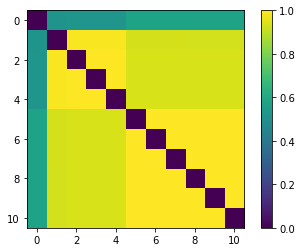

In [83]:
fig, ax = plt.subplots()

# Plot the heatmap
x_order = np.argsort(e1_overlap, 0)[:,0] #, np.argsort(e1_overlap, 1)[0,:]
for i in range(len(new_rels)):
    e1_overlap[i,i] = 0
im = ax.imshow(e1_overlap[x_order][:,x_order])

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('', rotation=-90, va="bottom")

In [84]:
e1_overlap[x_order][:,x_order][15]

IndexError: index 15 is out of bounds for axis 0 with size 11

In [833]:
new_rels[x_order][:22], new_rels[x_order][22:26], new_rels[x_order][26:34], new_rels[x_order][34:]

(array(['/base/x2010fifaworldcupsouthafrica/world_cup_squad/current_world_cup_squad./base/x2010fifaworldcupsouthafrica/current_world_cup_squad/current_club',
        '/film/special_film_performance_type/film_performance_type./film/performance/film',
        '/government/legislative_session/members./government/government_position_held/district_represented',
        '/sports/sports_position/players./sports/sports_team_roster/position',
        '/award/award_ceremony/awards_presented./award/award_honor/honored_for',
        '/user/ktrueman/default_domain/international_organization/member_states',
        '/ice_hockey/hockey_team/current_roster./sports/sports_team_roster/position',
        '/base/localfood/seasonal_month/produce_available./base/localfood/produce_availability/seasonal_months',
        '/government/legislative_session/members./government/government_position_held/legislative_sessions',
        '/sports/sports_position/players./american_football/football_historical_roster_posi

Text(0, 0.5, '')

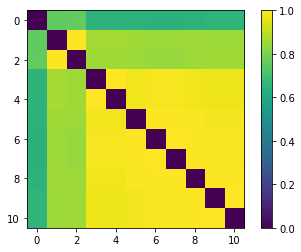

In [85]:
e2_overlap = np.array(
    [[len(e2_types[i].intersection(e2_types[j])) / len(e2_types[i].union(e2_types[j])) 
      for j in new_rels] for i in new_rels]
)

fig, ax = plt.subplots()

# Plot the heatmap
x_order = np.argsort(e2_overlap, 0)[:,0]#, np.argsort(e1_overlap, 1)[0,:]
for i in range(len(new_rels)):
    e2_overlap[i,i] = 0
im = ax.imshow(e2_overlap[x_order][:,x_order])

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('', rotation=-90, va="bottom")

In [86]:
e2_overlap[x_order][:,x_order][-1]

array([0.65268954, 0.85251407, 0.85814122, 0.974224  , 0.974224  ,
       0.98296727, 0.9888062 , 0.9888062 , 0.9944031 , 1.        ,
       0.        ])

In [87]:
new_rels[x_order][:7], new_rels[x_order][7:13], new_rels[x_order][13:22], new_rels[x_order][22:26], new_rels[x_order][26:]

(array(['_verb_group', '_similar_to', '_also_see', '_instance_hypernym',
        '_synset_domain_topic_of', '_member_of_domain_usage', '_has_part'],
       dtype=object),
 array(['_member_of_domain_region', '_member_meronym', '_hypernym',
        '_derivationally_related_form'], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object))

# Save new split 

In [88]:
if not os.path.exists(os.path.join(prefix,new_name)):
    os.mkdir(os.path.join(prefix,new_name))

In [89]:
dev_obj.reset_index()

,e1,rel,e2,n
0,10000787,_derivationally_related_form,{},0
1,10003120,_hypernym,{},0
2,10016103,_derivationally_related_form,{},0
3,1001689,_derivationally_related_form,{},0
4,10017272,_derivationally_related_form,{},0
...,...,...,...,...
5381,5510173,_derivationally_related_form,{},0
5382,13035707,_member_meronym,{},0
5383,14412564,_synset_domain_topic_of,{},0
5384,8958334,_similar_to,{},0


In [106]:
# save the transformation configuration 
with open(os.path.join(prefix, new_name, "transform.config"), "w") as f:
    f.write(
        "Entities in the data set: {} \n".format(len(new_ents))
    )
    f.write(
        "Number of queries by type (fake, no, single, multiple) for object and subjest position: \
        \n {} \t {} \t {} \t {} \t {} \t {} \t {} \t {} \n".format(
                *[len(x) for x in [F_obj, N_obj, S_obj, M_obj, F_subj, N_subj, S_subj, M_subj]]
        )
    )
    f.write("List of removed {} enities (seed={}): {}".format(len(ent_removed), seed, " ".join(ent_removed)))

In [91]:
train_str = "\n".join(["\t".join([str(e) for e in triple]) for triple in train.values])
print(train_str[:200])
with open("{}/{}/train.txt".format(prefix, new_name), "w") as f:
    f.write(train_str)

260881	_hypernym	260622
1332730	_derivationally_related_form	3122748
6066555	_derivationally_related_form	645415
9322930	_instance_hypernym	9360122
7193596	_derivationally_related_form	784342
1768969	


In [92]:
with open("{}/{}/valid_obj.txt".format(prefix, new_name), "w") as f:
    f.write("\n".join(["\t".join((str(t[0]), str(t[1]), " ".join(t[2]))) for t in dev_obj.reset_index()[['e1','rel','e2']].values]))

with open("{}/{}/valid_subj.txt".format(prefix, new_name), "w") as f:
    f.write("\n".join(["\t".join((" ".join(t[2]), str(t[1]), str(t[0]))) for t in dev_subj.reset_index()[['e2','rel','e1']].values]))
    
with open("{}/{}/test_obj.txt".format(prefix, new_name), "w") as f:
    f.write("\n".join(["\t".join((str(t[0]), str(t[1]), " ".join(t[2]))) for t in test_obj.reset_index()[['e1','rel','e2']].values]))
    
with open("{}/{}/test_subj.txt".format(prefix, new_name), "w") as f:
    f.write("\n".join(["\t".join((" ".join(t[2]), str(t[1]), str(t[0]))) for t in test_subj.reset_index()[['e2','rel','e1']].values]))

In [93]:
len(test_obj) + len(test_subj)

10034

#### Save in the case format

In [94]:
# reconstruct train from triples with asnwers
def reconstruct(dfr, dfl):
    cols = ['e1', 'rel', 'e2']
    triples = [(e1, rel, e2) for e1, rel, e2_multi in dfr[cols].values for e2 in e2_multi.split()]
    triples += [(e1, rel, e2) for e1_multi, rel, e2  in dfl[cols].values for e1 in e1_multi.split()]
    return set(triples)

In [95]:
new_dev_e2 = pd.read_csv(open("{}/{}/valid_obj.txt".format(prefix, new_name), "r"), sep='\t', header=None, names=['e1', 'rel', 'e2']).fillna('')
new_dev_e1 = pd.read_csv(open("{}/{}/valid_subj.txt".format(prefix, new_name), "r"), sep='\t', header=None, names=['e1', 'rel', 'e2']).fillna('')
new_test_e2 = pd.read_csv(open("{}/{}/test_obj.txt".format(prefix, new_name), "r"), sep='\t', header=None, names=['e1', 'rel', 'e2']).fillna('')
new_test_e1 = pd.read_csv(open("{}/{}/test_subj.txt".format(prefix, new_name), "r"), sep='\t', header=None, names=['e1', 'rel', 'e2']).fillna('')
new_dev_e2.tail()

,e1,rel,e2
5381,5510173,_derivationally_related_form,
5382,13035707,_member_meronym,
5383,14412564,_synset_domain_topic_of,
5384,8958334,_similar_to,
5385,6346461,_instance_hypernym,


In [96]:
new_dev_e2.loc[new_dev_e2.e2 != '']

,e1,rel,e2
1403,10066732,_derivationally_related_form,672277 672433
1404,1012712,_derivationally_related_form,657260 483801 739662
1405,1056411,_derivationally_related_form,1862918 2652922
1406,10648237,_derivationally_related_form,2394662 2412175
1407,1134781,_derivationally_related_form,122954 122661
...,...,...,...
4091,2584004,_member_meronym,2584145
4092,2585050,_derivationally_related_form,9778783
4093,2585489,_derivationally_related_form,10379758
4094,2585489,_hypernym,1803003


In [97]:
new_dev_e1.head()

,e1,rel,e2
0,,_derivationally_related_form,10000787
1,,_hypernym,10004804
2,,_hypernym,1001294
3,,_derivationally_related_form,10016103
4,,_derivationally_related_form,1001689


In [98]:
dev_cases = pd.DataFrame(data=reconstruct(new_dev_e2, new_dev_e1), columns=['e1','rel', 'e2'])
test_cases = pd.DataFrame(data=reconstruct(new_test_e2, new_test_e1), columns=['e1','rel', 'e2'])
dev_cases.loc[(dev_cases.e1 == '') | (dev_cases.e2 == '')]

,e1,rel,e2


In [99]:
dev_cases.e1

0        1844859
1         134564
2        2246686
3         238867
4        1949674
          ...   
5711     1708778
5712    11814584
5713     1452593
5714    12476510
5715     4913839
Name: e1, Length: 5716, dtype: object

In [100]:
dev_cases.to_csv(open("{}/{}/valid.txt".format(prefix, new_name), "w"), sep="\t", index=None, header=None)

In [101]:
test_cases.to_csv(open("{}/{}/test.txt".format(prefix, new_name), "w"), sep="\t", index=None, header=None)

In [102]:
frrel = dev_cases.groupby('rel').count().sort_values('e1', ascending=False)
frrel.head()

,e1,e2
rel,,
_hypernym,2312,2312
_derivationally_related_form,1876,1876
_member_meronym,883,883
_also_see,146,146
_instance_hypernym,146,146


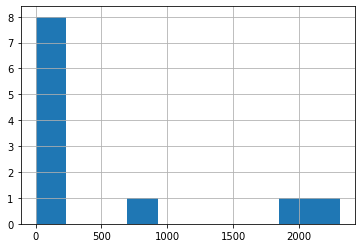

In [105]:
frrel.e1.hist(bins=10)#bins=[0,10,50,100,500,3000])

In [104]:
frrel.index.to_list()

['_hypernym',
 '_derivationally_related_form',
 '_member_meronym',
 '_also_see',
 '_instance_hypernym',
 '_synset_domain_topic_of',
 '_has_part',
 '_verb_group',
 '_member_of_domain_region',
 '_member_of_domain_usage',
 '_similar_to']

# Compare to the published version

#### Analyse input data for the FB13k-237 (wrangle_KG.py output, `e1rel_to_e2_train.json`) and the FB13k-QAQ (`train.txt`)

In [685]:
## load FB15k-237 used for the first genereation process (the preprocessed .jsons)
## QUERY FORMAT
train_prep, eval_prep = [], []
idx = 0
for var, name in [(train_prep, 'train'), (eval_prep, 'ranking_dev'), (eval_prep, 'ranking_test')]:
    with open("/mounts/work/speranskaya/data/FB15k-237/e1rel_to_e2_%s.json"%name) as f:
        test_triples = f.readlines()
    for triple in test_triples:
        row = json.loads(triple)
        row['name'] = name
        row['id'] = idx
        idx +=1
        var.append(row)
#train_prep, eval_prep = pd.DataFrame(train_prep), pd.DataFrame(eval_prep)

In [686]:
print(len(train_prep), len(eval_prep))

272115 38001


In [ ]:
entities

In [665]:
## load FB15k-237 used for the second genereation process (the original txts)
## QUERY FORMAT
dataset = 'FB15k-237'
data = []
for i, name in enumerate(['train', 'valid', 'test']):
    data.append(pd.read_csv(sep="\t", filepath_or_buffer="{}/{}/{}.txt".format(prefix, dataset, name), 
                            header=None, names=['e1', 'rel', 'e2']))

In [695]:
train_init = data[0].astype(str)
eval_init = pd.concat(data[1:3]).astype(str)
len(train_init), len(eval_init)

(272115, 38001)

In [690]:
N = (len(train_init)+ len(eval_init)) * 2  # amount of facts per position
N

579300

--> double number of queries in the first edition of the dataset

- is a logical consequence of a higher number of removed entities

? now removing too much entities results in a overwhelming number of No-answer queries. Error in generation no/single/mult statistics in one of the processes? **IMPOSSIBLE SINCE THIS IS NOT PROCESSED DATA**

? why are there non-existant entities in the removed list from the first edition?

#### Analyse the resulting datasets FB13k-237 (`train.txt` etc.) and the FB13k-QAQ (`train.txt` etc.)

In [691]:
train_pub = pd.read_csv(open(os.path.join(prefix, "FB13k-237/train.txt"), "r"), header=None, sep='\t', names=['e1','rel','e2'])
train_pub['triple'] = train_pub.e1 + '\t' + train_pub.rel + '\t' + train_pub.e2
dev_pub = pd.read_csv(open(os.path.join(prefix, "FB13k-237/valid.txt"), "r"), header=None, sep='\t', names=['e1','rel','e2'])
dev_pub['triple'] = dev_pub.e1 + '\t' + dev_pub.rel + '\t' + dev_pub.e2
test_pub = pd.read_csv(open(os.path.join(prefix, "FB13k-237/test.txt"), "r"), header=None, sep='\t', names=['e1','rel','e2'])
test_pub['triple'] = test_pub.e1 + '\t' + test_pub.rel + '\t' + test_pub.e2

In [692]:
len(train_pub), len(dev_pub), len(test_pub)

(213538, 22256, 22185)

In [693]:
train_pub.head()

,e1,rel,e2,triple
0,/m/014635,/people/person/spouse_s./people/marriage/type_...,/m/04ztj,/m/014635\t/people/person/spouse_s./people/mar...
1,/m/01fs__,/tv/tv_program/country_of_origin,/m/09c7w0,/m/01fs__\t/tv/tv_program/country_of_origin\t/...
2,/m/0d_84,/people/person/places_lived./people/place_live...,/m/05fjy,/m/0d_84\t/people/person/places_lived./people/...
3,/m/025mb9,/award/award_category/winners./award/award_hon...,/m/02dbp7,/m/025mb9\t/award/award_category/winners./awar...
4,/m/0d063v,/film/film_subject/films,/m/024l2y,/m/0d063v\t/film/film_subject/films\t/m/024l2y


In [6]:
train_orig = data[0]
train_orig['triple'] = train_orig.e1 + '\t' + train_orig.rel + '\t' + train_orig.e2
train_orig.head()

,e1,rel,e2,triple
0,/m/027rn,/location/country/form_of_government,/m/06cx9,/m/027rn\t/location/country/form_of_government...
1,/m/017dcd,/tv/tv_program/regular_cast./tv/regular_tv_app...,/m/06v8s0,/m/017dcd\t/tv/tv_program/regular_cast./tv/reg...
2,/m/07s9rl0,/media_common/netflix_genre/titles,/m/0170z3,/m/07s9rl0\t/media_common/netflix_genre/titles...
3,/m/01sl1q,/award/award_winner/awards_won./award/award_ho...,/m/044mz_,/m/01sl1q\t/award/award_winner/awards_won./awa...
4,/m/0cnk2q,/soccer/football_team/current_roster./sports/s...,/m/02nzb8,/m/0cnk2q\t/soccer/football_team/current_roste...


In [674]:
len(train_orig)

272115

In [7]:
eval_orig = pd.concat(data[1:])
eval_orig['triple'] = eval_orig.e1 + '\t' + eval_orig.rel + '\t' + eval_orig.e2
eval_orig.head()

,e1,rel,e2,triple
0,/m/07pd_j,/film/film/genre,/m/02l7c8,/m/07pd_j\t/film/film/genre\t/m/02l7c8
1,/m/06wxw,/location/location/time_zones,/m/02fqwt,/m/06wxw\t/location/location/time_zones\t/m/02...
2,/m/01t94_1,/people/person/spouse_s./people/marriage/type_...,/m/04ztj,/m/01t94_1\t/people/person/spouse_s./people/ma...
3,/m/02xcb6n,/award/award_category/winners./award/award_hon...,/m/04x4s2,/m/02xcb6n\t/award/award_category/winners./awa...
4,/m/07f_7h,/film/film/release_date_s./film/film_regional_...,/m/04gzd,/m/07f_7h\t/film/film/release_date_s./film/fil...


In [8]:
train_new = pd.read_csv(open(os.path.join(prefix, "FB13k-QAQ/train.txt"), "r"), header=None, sep='\t', names=['e1','rel','e2'])
train_new['triple'] = train_new.e1 + '\t' + train_new.rel + '\t' + train_new.e2
dev_new = pd.read_csv(open(os.path.join(prefix, "FB13k-QAQ/valid.txt"), "r"), header=None, sep='\t', names=['e1','rel','e2'])
dev_new['triple'] = dev_new.e1 + '\t' + dev_new.rel + '\t' + dev_new.e2
test_new = pd.read_csv(open(os.path.join(prefix, "FB13k-QAQ/test.txt"), "r"), header=None, sep='\t', names=['e1','rel','e2'])
test_new['triple'] = test_new.e1 + '\t' + test_new.rel + '\t' + test_new.e2
train_new.head()

,e1,rel,e2,triple
0,/m/027rn,/location/country/form_of_government,/m/06cx9,/m/027rn\t/location/country/form_of_government...
1,/m/017dcd,/tv/tv_program/regular_cast./tv/regular_tv_app...,/m/06v8s0,/m/017dcd\t/tv/tv_program/regular_cast./tv/reg...
2,/m/07s9rl0,/media_common/netflix_genre/titles,/m/0170z3,/m/07s9rl0\t/media_common/netflix_genre/titles...
3,/m/01sl1q,/award/award_winner/awards_won./award/award_ho...,/m/044mz_,/m/01sl1q\t/award/award_winner/awards_won./awa...
4,/m/0cnk2q,/soccer/football_team/current_roster./sports/s...,/m/02nzb8,/m/0cnk2q\t/soccer/football_team/current_roste...


In [675]:
len(train_new)

254070

In [9]:
def get_ents_from_facts(facts):
    return set(pd.concat([facts.e1, facts.e2]).values)

def get_ents_from_queries(queries, mode):
    # mode 1 or 2 for subject and object position queries
    query_ents = set(queries['e{}'.format(3 - mode)].values)    
    answer_ents = {x for ans_set in queries['e{}'.format(mode)] for x in ans_set.split()}
    return query_ents.union(answer_ents)    

In [11]:
eval_pub = pd.concat([dev_pub, test_pub])
eval_new = pd.concat([dev_new, test_new])

In [19]:
eval_pub.head()

,e1,rel,e2,triple
0,/m/0821j,/influence/influence_node/influenced_by,/m/040db,/m/0821j\t/influence/influence_node/influenced...
1,/m/02_n5d,/people/person/spouse_s./people/marriage/type_...,/m/04ztj,/m/02_n5d\t/people/person/spouse_s./people/mar...
2,/m/0bmh4,/people/deceased_person/place_of_burial,/m/018mmj,/m/0bmh4\t/people/deceased_person/place_of_bur...
3,/m/099c8n,/award/award_category/nominees./award/award_no...,/m/03s9kp,/m/099c8n\t/award/award_category/nominees./awa...
4,/m/09c7w0,/location/location/contains,/m/01nl79,/m/09c7w0\t/location/location/contains\t/m/01nl79


#### Check total amount of remaining facts

In [694]:
# only to reproduce the published split
ent_removed = ['/m/0m_v0', '/m/04svwx', '/m/02rgz4', '/m/0295sy', '/m/0fnpj', '/m/0zchj', '/m/08pgl8', '/m/09th87', '/m/07y9ts', '/m/01drsx', '/m/02jm9c', '/m/095zlp', '/m/015c2f', '/m/02flpc', '/m/02vg0', '/m/0cq8qq', '/m/0d0kn', '/m/02qwg', '/m/0pgm3', '/m/04bfg', '/m/0bth54', '/m/018mmw', '/m/0738y5', '/m/0jn38', '/m/019n9w', '/m/05dxl_', '/m/0f4yh', '/m/0kq39', '/m/0k6yt1', '/m/06wbm8q', '/m/01b_d4', '/m/03339m', '/m/0frq6', '/m/0fvf9q', '/m/02qy3py', '/m/0jqj5', '/m/0h3vhfb', '/m/0c55fj', '/m/04_1l0v', '/m/04p3w', '/m/0241jw', '/m/01shy7', '/m/06y9c2', '/m/04jbyg', '/m/0h63q6t', '/m/0jm3b', '/m/03177r', '/m/01c7p_', '/m/01cm8w', '/m/064vjs', '/m/0465_', '/m/03m6j', '/m/01f62', '/m/02rn00y', '/m/055c8', '/m/01bcwk', '/m/01l8t8', '/m/01svq8', '/m/0d1yn', '/m/056zf9', '/m/027j9wd', '/m/0257w4', '/m/02_cx_', '/m/02pv_d', '/m/0bpbhm', '/m/03czz87', '/m/0c00zd0', '/m/0gs5q', '/m/0fs9vc', '/m/07gql', '/m/035wq7', '/m/01qcx_', '/m/013x0b', '/m/02g9p4', '/m/0c0nhgv', '/m/09mq4m', '/m/050gkf', '/m/0fkx3', '/m/01qb5d', '/m/07ylj', '/m/03qy3l', '/m/035rnz', '/m/01n6c', '/m/04zl8', '/m/02t0n9', '/m/027bs_2', '/m/07jnt', '/m/018d6l', '/m/01tm2s', '/m/03f4w4', '/m/02zd460', '/m/0j86l', '/m/01zpmq', '/m/06rny', '/m/01mqnr', '/m/07g_0c', '/m/0152n0', '/m/01d_h8', '/m/0329qp', '/m/0b82vw', '/m/0gvstc3', '/m/0cl0bk', '/m/0f4l5', '/m/0c_md_', '/m/03205_', '/m/01sxdy', '/m/026y3cf', '/m/01cyd5', '/m/01qx13', '/m/04bbb8', '/m/0jmh7', '/m/01xcgf', '/m/06j6l', '/m/02wb6yq', '/m/0dq3c', '/m/01v3x8', '/m/05m63c', '/m/0c7f7', '/m/026h21_', '/m/05pcjw', '/m/02l840', '/m/035nm', '/m/03h_fk5', '/m/01zkhk', '/m/0bxg3', '/m/03lvyj', '/m/06rqw', '/m/09d6p2', '/m/07brj', '/m/0djywgn', '/m/03qkcn9', '/m/02dlfh', '/m/0fcyj', '/m/0fqy4p', '/m/04y5j64', '/m/0159h6', '/m/07wrz', '/m/0999q', '/m/05b2gsm', '/m/0jf1b', '/m/022s1m', '/m/0yshw', '/m/03c0t9', '/m/0d9z_y', '/m/0gqmvn', '/m/06688p', '/m/01t21q', '/m/05t0zfv', '/m/0cs134', '/m/02zyq6', '/m/0g57ws5', '/m/03bdv', '/m/01kwlwp', '/m/09v42sf', '/m/0l2v0', '/m/01qn7n', '/m/0nvvw', '/m/059dn', '/m/0dm00', '/m/05qhw', '/m/01g4yw', '/m/02s4l6', '/m/0303jw', '/m/01v8y9', '/m/02r22gf', '/m/0dgq80b', '/m/0gmcwlb', '/m/077rj', '/m/010bnr', '/m/01y06y', '/m/05hqv', '/m/01jllg1', '/m/03mstc', '/m/0fmyd', '/m/0hr6lkl', '/m/01vtmw6', '/m/07lnk', '/m/0cmdwwg', '/m/01sqd7', '/m/02ktrs', '/m/0lgsq', '/m/06lj1m', '/m/01gbcf', '/m/05sbv3', '/m/0418ft', '/m/09n4nb', '/m/01q24l', '/m/03r0g9', '/m/07f7jp', '/m/0141kz', '/m/0h08p', '/m/0g133', '/m/080v2', '/m/0l0wv', '/m/03qh03g', '/m/0fv4v', '/m/02t8gf', '/m/051ls', '/m/0gkkf', '/m/0jnkr', '/m/0187x8', '/m/02s_qz', '/m/05jrj4', '/m/0lkm', '/m/0br1w', '/m/0140t7', '/m/01sn3', '/m/02f46y', '/m/07l2m', '/m/03wnh', '/m/0b1q7c', '/m/042gr4', '/m/0gj8t_b', '/m/03cwqpm', '/m/0r3tb', '/m/01k3tq', '/m/01xl5', '/m/037gjc', '/m/0m8vm', '/m/060pl5', '/m/01x6v6', '/m/03z5xd', '/m/025t7ly', '/m/01xzb6', '/m/04chyn', '/m/01pt5w', '/m/0nk72', '/m/0gkr9q', '/m/0ygbf', '/m/01cbwl', '/m/01f6x7', '/m/03by7wc', '/m/02n4kr', '/m/06n8j', '/m/029pnn', '/m/06mr6', '/m/0432_5', '/m/05zvq6g', '/m/041jk9', '/m/0c57yj', '/m/0c8wxp', '/m/015ynm', '/m/07_fj54', '/m/034qt_', '/m/0g7pm1', '/m/0781g', '/m/053yx', '/m/015zql', '/m/0trv', '/m/0127gn', '/m/0n5j_', '/m/03gyvwg', '/m/02665kn', '/m/01rgcg', '/m/01c9x', '/m/0170yd', '/m/04fcjt', '/m/01l7cxq', '/m/027rqbx', '/m/0343h', '/m/040j2_', '/m/0gvrws1', '/m/02g5bf', '/m/05cwl_', '/m/0fvppk', '/m/02gvwz', '/m/0f_y9', '/m/05r5w', '/m/07qv_', '/m/0h2zvzr', '/m/05q9g1', '/m/0340hj', '/m/04qb6g', '/m/09pjnd', '/m/027y_', '/m/015hr', '/m/029bkp', '/m/07cz2', '/m/05k17c', '/m/06gd4', '/m/015pvh', '/m/0k_p5', '/m/03nymk', '/m/0j06n', '/m/01wmxfs', '/m/024dzn', '/m/02p76f9', '/m/09hnb', '/m/01swmr', '/m/04mky3', '/m/01pq4w', '/m/0p_47', '/m/019lxm', '/m/01vb6z', '/m/0gd5z', '/m/0n83s', '/m/02237m', '/m/0fs_s', '/m/011hq1', '/m/012v1t', '/m/01my4f', '/m/011v3', '/m/01xbp7', '/m/05drr9', '/m/03f_jk', '/m/0f0qfz', '/m/0d8_wz', '/m/02b0yk', '/m/02bqxb', '/m/0l3kx', '/m/01grrf', '/m/031rq5', '/m/0crh5_f', '/m/0ycht', '/m/0123_x', '/m/0222qb', '/m/01cf5', '/m/0jryt', '/m/02w7gg', '/m/0bwgc_', '/m/07ym0', '/m/02wtp6', '/m/0gz6b6g', '/m/01gst_', '/m/03_f0', '/m/07zlqp', '/m/01xhh5', '/m/019c57', '/m/0872p_c', '/m/084z0w', '/m/05fyy5', '/m/015zyd', '/m/0mfj2', '/m/03czrpj', '/m/02ppg1r', '/m/03qcq', '/m/01qg7c', '/m/044pqn', '/m/026p4q7', '/m/06wkj0', '/m/06y_n', '/m/061v5m', '/m/09rvcvl', '/m/06pjs', '/m/018y81', '/m/0c9l1', '/m/05qc_', '/m/059x66', '/m/0dk0dj', '/m/070w7s', '/m/09l3p', '/m/0443c', '/m/05c6073', '/m/0lfyx', '/m/039bp', '/m/0m3gy', '/m/0p4wb', '/m/01wdcxk', '/m/015bpl', '/m/01c0cc', '/m/027qq9b', '/m/01grpc', '/m/02qjb_', '/m/06dkzt', '/m/01c6l', '/m/0hv8w', '/m/02jxmr', '/m/02f8lw', '/m/01f6zc', '/m/0gd92', '/m/071_8', '/m/01qqwp9', '/m/0frsw', '/m/0mnm2', '/m/05qbbfb', '/m/059x3p', '/m/03kbr', '/m/038rzr', '/m/02d6n_', '/m/09x8ms', '/m/06cmp', '/m/05fg2', '/m/080dyk', '/m/0c38gj', '/m/0bmnm', '/m/0534nr', '/m/01p2b_', '/m/0czhv7', '/m/07t_x', '/m/08jcfy', '/m/01lrrt', '/m/041288', '/m/09qr6', '/m/09gkdln', '/m/024dw0', '/m/0htlr', '/m/01kr6k', '/m/01vl17', '/m/02lkcc', '/m/01yc02', '/m/04m8fy', '/m/01hbq0', '/m/0fdv3', '/m/01pv91', '/m/026kqs9', '/m/05p8bf9', '/m/07hhnl', '/m/02qwzkm', '/m/05l5n', '/m/034np8', '/m/0tfc', '/m/0g39h', '/m/0fsv2', '/m/0dbb3', '/m/037w7r', '/m/01hxs4', '/m/02l7c8', '/m/02_286', '/m/02h22', '/m/02mxbd', '/m/0p7pw', '/m/0fd3y', '/m/0frnff', '/m/03mbdx_', '/m/01242_', '/m/02jr26', '/m/02xgdv', '/m/03m5y9p', '/m/071h5c', '/m/011yxy', '/m/03bxp5', '/m/04l58n', '/m/073h5b', '/m/07h76', '/m/03v52f', '/m/0b4rf3', '/m/05xpms', '/m/06nsb9', '/m/022qqh', '/m/0167v', '/m/0tr3p', '/m/01ljpm', '/m/0gtvpkw', '/m/04t2t', '/m/02482c', '/m/01x5fb', '/m/02bfxb', '/m/08htt0', '/m/03y0pn', '/m/05sy0cv', '/m/01g63y', '/m/073tm9', '/m/01_j71', '/m/05q5t0b', '/m/0mfc0', '/m/01qszl', '/m/0436zq', '/m/01j8yr', '/m/01jdpf', '/m/01hp5', '/m/09p3_s', '/m/01f7v_', '/m/019lwb', '/m/0284gc', '/m/01tvz5j', '/m/0fg6k', '/m/0flddp', '/m/09889g', '/m/015np0', '/m/0nh57', '/m/01336l', '/m/0kst7v', '/m/01hd99', '/m/0g2mbn', '/m/019lty', '/m/02q0k7v', '/m/01y8cr', '/m/03b_fm5', '/m/064nh4k', '/m/017vb_', '/m/02k6hp', '/m/02bv9', '/m/014vm4', '/m/05gqf', '/m/0n2k5', '/m/04b19t', '/m/0lzkm', '/m/01jq34', '/m/0fztbq', '/m/0806vbn', '/m/0mpfn', '/m/064p92m', '/m/025569', '/m/0f4vx', '/m/05vtw', '/m/04h07s', '/m/01vrt_c', '/m/03x746', '/m/0nqph', '/m/01j67j', '/m/02cqbx', '/m/0gj4fx', '/m/03mp9s', '/m/01ypc', '/m/0kfpm', '/m/01xndd', '/m/014zfs', '/m/01b7b', '/m/06fcqw', '/m/014kbl', '/m/015c4g', '/m/01t110', '/m/0163t3', '/m/0hg11', '/m/013719', '/m/0dzfdw', '/m/0db86', '/m/01vx5w7', '/m/01gln9', '/m/0cjf0', '/m/071jv5', '/m/05vsb7', '/m/0ct_yc', '/m/02bqy', '/m/0417z2', '/m/01mc11', '/m/0f102', '/m/016s0m', '/m/02jxrw', '/m/01l1sq', '/m/039crh', '/m/02rbdlq', '/m/07q68q', '/m/0mw_q', '/m/0bmhn', '/m/04zxrt', '/m/0ff3y', '/m/015_30', '/m/02_fz3', '/m/082gq', '/m/02qpt1w', '/m/01rwcgb', '/m/02cpp', '/m/0c3jz', '/m/05znbh7', '/m/05f_3', '/m/014bpd', '/m/0kcw2', '/m/07nx9j', '/m/09hd16', '/m/057xn_m', '/m/01ypsj', '/m/02cw1m', '/m/0697s', '/m/013v5j', '/m/042fgh', '/m/01f1p9', '/m/01y9pk', '/m/02cbs0', '/m/02ptczs', '/m/06jtd', '/m/019389', '/m/0jm7n', '/m/03lpp_', '/m/07kh6f3', '/m/017vkx', '/m/07hwkr', '/m/02lgj6', '/m/07z542', '/m/017d93', '/m/01cblr', '/m/0fdtd7', '/m/0hn4h', '/m/09ntbc', '/m/03bxwtd', '/m/0jyx6', '/m/04rcr', '/m/011yrp', '/m/05f4vxd', '/m/01r5xw', '/m/08624h', '/m/01z2sn', '/m/02fp3', '/m/02778pf', '/m/013y1f', '/m/0gtzp', '/m/014kj2', '/m/013nws', '/m/023znp', '/m/026bt_h', '/m/057bxr', '/m/01lct6', '/m/027t8fw', '/m/016yxn', '/m/059f4', '/m/07kfzsg', '/m/0n5yv', '/m/0n839', '/m/0mzy7', '/m/09qv_s', '/m/03rwng', '/m/01vsnff', '/m/05zwrg0', '/m/03_48k', '/m/0bm9xk', '/m/011ykb', '/m/0ckm4x', '/m/025b5y', '/m/05j49', '/m/04b5l3', '/m/016tb7', '/m/02vmzp', '/m/03ln8b', '/m/0n5_g', '/m/01fmz6', '/m/0mvxt', '/m/02qfh', '/m/073x6y', '/m/05p7tx', '/m/0163v', '/m/07y2b', '/m/01v_pj6', '/m/074w86', '/m/0dc_v', '/m/0c78m', '/m/0d2psv', '/m/02lxrv', '/m/0xsk8', '/m/0cq7tx', '/m/02_n5d', '/m/027qb1', '/m/02r_pp', '/m/0r1yc', '/m/0djkrp', '/m/0prh7', '/m/0p8r1', '/m/0b7gr2', '/m/0k89p', '/m/032sl_', '/m/067nsm', '/m/0mgkg', '/m/01sb5r', '/m/05zn92p', '/m/01slc', '/m/0mbwf', '/m/01kkx2', '/m/05cj4r', '/m/0pk1p', '/m/0chrx', '/m/01v1d8', '/m/03v36', '/m/026mff', '/m/01gf5h', '/m/08ct6', '/m/024lt6', '/m/0ngg', '/m/07fb8_', '/m/034_t5', '/m/061y4q', '/m/04sh80', '/m/0106dv', '/m/040_t', '/m/0_7z2', '/m/03ndd', '/m/014kkm', '/m/02rq7nd', '/m/046f25', '/m/0f2w0', '/m/01wp8w7', '/m/02f73p', '/m/05sq0m', '/m/01p726', '/m/04mz10g', '/m/03b1sb', '/m/0gj9tn5', '/m/01p45_v', '/m/019mcm', '/m/0cv13', '/m/016yvw', '/m/0276g40', '/m/015lhm', '/m/03hpr', '/m/06jntd', '/m/0vm5t', '/m/0mkp7', '/m/02wwwv5', '/m/0mpdw', '/m/023zl', '/m/02yy_j', '/m/03459x', '/m/060m4', '/m/0kh6b', '/m/013423', '/m/0bs5k8r', '/m/05mt6w', '/m/0_lk5', '/m/03flwk', '/m/0n1tx', '/m/05r6t', '/m/03d_w3h', '/m/022qw7', '/m/04gbl3', '/m/0gf28', '/m/049t4g', '/m/0c7t58', '/m/09d5d5', '/m/06n3y', '/m/0gt_k', '/m/05qzv', '/m/0mbf4', '/m/01clyb', '/m/01q0kg', '/m/06v99d', '/m/0drtkx', '/m/01_f_5', '/m/01wsl7c', '/m/02n9bh', '/m/01xhb_', '/m/016_nr', '/m/0208wk', '/m/017f3m', '/m/03rl1g', '/m/01_9fk', '/m/0b6p3qf', '/m/01r_t_', '/m/01p79b', '/m/0jgm8', '/m/01jq4b', '/m/05q_mg', '/m/03qmx_f', '/m/087z12', '/m/0257pw', '/m/02nrdp', '/m/03pnvq', '/m/0k5px', '/m/0c5x_', '/m/015rkw', '/m/01x66d', '/m/04j14qc', '/m/04mx8h4', '/m/05bpg3', '/m/034ls', '/m/02lpp7', '/m/0bdt8', '/m/075fzd', '/m/06rzwx', '/m/01zfmm', '/m/01hpf6', '/m/057dxsg', '/m/0g5rg', '/m/0pdp8', '/m/01vs8ng', '/m/01kymm', '/m/02hy9p', '/m/030pr', '/m/0gthm', '/m/0g56t9t', '/m/01c40n', '/m/01fh36', '/m/02q5g1z', '/m/0bt7w', '/m/036gdw', '/m/01vw20_', '/m/02cllz', '/m/01trxd', '/m/02l_7y', '/m/09d11', '/m/0pv3x', '/m/0fsb8', '/m/026spg', '/m/0dx84s', '/m/0411q', '/m/04b2qn', '/m/02pyyld', '/m/0flw6', '/m/0hl3d', '/m/01wb8bs', '/m/08z956', '/m/0jg77', '/m/02y6fz', '/m/0jcx', '/m/0pkgt', '/m/012gk9', '/m/0468g4r', '/m/02wvf2s', '/m/025ygws', '/m/041r51', '/m/0372p', '/m/0cwtm', '/m/073hmq', '/m/025b3k', '/m/02fgm7', '/m/0326tc', '/m/016_rm', '/m/042l3v', '/m/015gw6', '/m/0kc40', '/m/034gxk', '/m/0mw93', '/m/03yf3z', '/m/01j_jh', '/m/052nd', '/m/06lc85', '/m/0b_6xf', '/m/025rcc', '/m/045346', '/m/023322', '/m/06cm5', '/m/03lmzl', '/m/01z645', '/m/02grdc', '/m/07x21', '/m/04t9c0', '/m/02s2ft', '/m/03359d', '/m/030qb3t', '/m/028cg00', '/m/06_vpyq', '/m/03h_yfh', '/m/0yyn5', '/m/0693l', '/m/02c638', '/m/025v26c', '/m/047kn_', '/m/019w9j', '/m/07l1c', '/m/016yzz', '/m/01xbxn', '/m/021lkq', '/m/0m_xy', '/m/0djvzd', '/m/017j69', '/m/02q690_', '/m/0zc6f', '/m/02kx3', '/m/02g_6x', '/m/041wm', '/m/075k5', '/m/09l9xt', '/m/036jv', '/m/07m9cm', '/m/04n6k', '/m/0g9wdmc', '/m/0cqt41', '/m/0561xh', '/m/082brv', '/m/02w86hz', '/m/0_xdd', '/m/067xw', '/m/05w1vf', '/m/0ckcvk', '/m/02scbv', '/m/028p0', '/m/078vc', '/m/060d2', '/m/016ks_', '/m/01n4w', '/m/0dj0x', '/m/03jg5t', '/m/0tz41', '/m/0gtt5fb', '/m/01c333', '/m/0jqb8', '/m/04_by', '/m/01kx_81', '/m/0102t4', '/m/0rrwt', '/m/0kszw', '/m/09f07', '/m/07f_t4', '/m/0g9zcgx', '/m/06nzl', '/m/0362q0', '/m/020qr4', '/m/02l1fn', '/m/01531', '/m/072vj', '/m/04pk9', '/m/018d5b', '/m/0j_sncb', '/m/0xjl2', '/m/013qvn', '/m/09nqf', '/m/01vfqh', '/m/0d1t3', '/m/016gp5', '/m/02mqc4', '/m/01fwj8', '/m/02hrh0_', '/m/0d99m', '/m/0dn8b', '/m/02c6d', '/m/02t_8z', '/m/07wg3', '/m/01rf57', '/m/02wkmx', '/m/018grr', '/m/0jnl5', '/m/05925', '/m/06ch55', '/m/03cd0x', '/m/01ty7ll', '/m/03q5t', '/m/03n69x', '/m/01rp13', '/m/04bdzg', '/m/0glqh5_', '/m/025s0zp', '/m/0g824', '/m/02mc79', '/m/02mt51', '/m/05l3g_', '/m/08hbxv', '/m/025m98', '/m/0fy59t', '/m/01v2xl', '/m/081g_l', '/m/06xj4w', '/m/07_k0c0', '/m/09swkk', '/m/0bx_hnp', '/m/084x96', '/m/0ntpv', '/m/02r34n', '/m/01flzb', '/m/025v1sx', '/m/017n9', '/m/01rvgx', '/m/015fr', '/m/01t6b4', '/m/02vnpv', '/m/01m1_t', '/m/03jqfx', '/m/0277g', '/m/02lxj_', '/m/03f22dp', '/m/02qdymm', '/m/03975z', '/m/0gdh5', '/m/049rl0', '/m/06pr6', '/m/050xpd', '/m/0d1mp3', '/m/01grqd', '/m/01yjl', '/m/01gbbz', '/m/02114t', '/m/0cg39k', '/m/02xwq9', '/m/07nv3_', '/m/05mrx8', '/m/03gm48', '/m/0cv9b', '/m/0fqnzts', '/m/05v10', '/m/0727h', '/m/0fq9zdv', '/m/0yzyn', '/m/01cwm1', '/m/02vr7', '/m/0c0cs', '/m/01kb2j', '/m/0c422z4', '/m/07z2lx', '/m/011s9r', '/m/03jvmp', '/m/04f73rc', '/m/092vkg', '/m/050ks', '/m/0smfm', '/m/04c636', '/m/06mz5', '/m/02r7lqg', '/m/05f7w84', '/m/0138t4', '/m/01ggbx', '/m/04xfb', '/m/018z_c', '/m/0gk7z', '/m/0sydc', '/m/0n2vl', '/m/01qdjm', '/m/07gyp7', '/m/01gzm2', '/m/0184jw', '/m/016t_3', '/m/04344j', '/m/02h4rq6', '/m/0642xf3', '/m/02_gzx', '/m/01gjlw', '/m/0150t6', '/m/05yzt_', '/m/01pxqx', '/m/0pmw9', '/m/019vgs', '/m/08qs09', '/m/0l4h_', '/m/02jp2w', '/m/04w8f', '/m/01p5xy', '/m/035bcl', '/m/05ldnp', '/m/012jc', '/m/01n4nd', '/m/01htzx', '/m/01438g', '/m/0hky', '/m/03d0ns', '/m/027752', '/m/03z106', '/m/014kg4', '/m/01vsqvs', '/m/03prz_', '/m/03qbm', '/m/040b5k', '/m/04bs3j', '/m/02cgb8', '/m/084qpk', '/m/02lbrd', '/m/083my7', '/m/048z7l', '/m/0fpzt5', '/m/0gmf0nj', '/m/01tf_6', '/m/025y67', '/m/02cm61', '/m/0fqyzz', '/m/01x9_8', '/m/04pqqb', '/m/0m491', '/m/03z0dt', '/m/04dm2n', '/m/01rr_d', '/m/018sg9', '/m/02s6sh', '/m/0lv1x', '/m/01m2n1', '/m/05m883', '/m/04cj79', '/m/0fpjd_g', '/m/0bjqh', '/m/03m4mj', '/m/02kth6', '/m/09jd9', '/m/0blt6', '/m/01nxzv', '/m/02f1c', '/m/06w58f', '/m/01trhmt', '/m/027f2w', '/m/07mb57', '/m/01kp66', '/m/0h0yt', '/m/01kj0p', '/m/0393g', '/m/01c6k4', '/m/018s6c', '/m/05kjc6', '/m/011_vz', '/m/0cgfb', '/m/029rk', '/m/04dyqk', '/m/06c7mk', '/m/01v80y', '/m/035qlx', '/m/0n6nl', '/m/01_bkd', '/m/06mx8', '/m/01d2v1', '/m/0154d7', '/m/0dwt5', '/m/0604m', '/m/0212ny', '/m/03v1xb', '/m/06274w', '/m/01l63', '/m/027m5wv', '/m/0212zp', '/m/05zh9c', '/m/06y0xx', '/m/027ct7c', '/m/0f40w', '/m/058wp', '/m/05pt0l', '/m/0j8p6', '/m/0tl6d', '/m/05wp1p', '/m/0gr07', '/m/02w0dc0', '/m/01skmp', '/m/0d2ww', '/m/03n785', '/m/017510', '/m/095z4q', '/m/01kvrz', '/m/04gm7n', '/m/0db94w', '/m/03j722', '/m/05nzw6', '/m/017kz7', '/m/0hvb2', '/m/0147w8', '/m/027j79k', '/m/01w61th', '/m/04bpm6', '/m/01cx_', '/m/041rx', '/m/0bbm7r', '/m/01mqc_', '/m/05j82v', '/m/02w9sd7', '/m/02nq10', '/m/0bq8tmw', '/m/048svj', '/m/01c3q', '/m/0jclr', '/m/0ggx5q', '/m/05h7tk', '/m/01vw77', '/m/0cbhh', '/m/05gnf', '/m/05ch98', '/m/0453t', '/m/026c1', '/m/08xvpn', '/m/018qb4', '/m/02gx2k', '/m/0bwfwpj', '/m/011yd2', '/m/0fthdk', '/m/01mvpv', '/m/01kcms4', '/m/02l4pj', '/m/018ysx', '/m/03dj48', '/m/0f11p', '/m/09v6gc9', '/m/011wtv', '/m/0c11mj', '/m/01f8gz', '/m/06w92', '/m/0k3kg', '/m/06t8v', '/m/047vp1n', '/m/02w7fs', '/m/02gdjb', '/m/07fq1y', '/m/011k_j', '/m/09ld6g', '/m/05dxl5', '/m/0408m53', '/m/0bk5r', '/m/02279c', '/m/03f1zhf', '/m/01j5ql', '/m/08821', '/m/0x2sv', '/m/01tlrp', '/m/02xhwm', '/m/06s0l', '/m/0qlnr', '/m/02ndj5', '/m/02sf_r', '/m/0c3dzk', '/m/0fqyc', '/m/0b05xm', '/m/0mww2', '/m/0vqcq', '/m/0yfvf', '/m/025rzfc', '/m/01qqwn', '/m/035qgm', '/m/09x3r', '/m/02xcb6n', '/m/06gcn', '/m/01p5_g', '/m/03d49', '/m/0f42nz', '/m/0c_jc', '/m/07b1gq', '/m/0dyl9', '/m/09wj5', '/m/06mq7', '/m/0258dh', '/m/0g8rj', '/m/054k_8', '/m/01771z', '/m/0qmhk', '/m/0g51l1', '/m/03x31g', '/m/07bzp', '/m/025vl4m', '/m/01j5sv', '/m/03llf8', '/m/03shpq', '/m/0fd6qb', '/m/05n19y', '/m/06k75', '/m/03t1s', '/m/049n2l', '/m/097h2', '/m/04cdxc', '/m/021bmf', '/m/01l_pn', '/m/02sgy', '/m/02kb_jm', '/m/01rcmg', '/m/0lmm3', '/m/02bn_p', '/m/01x73', '/m/018gqj', '/m/06szd3', '/m/0ds1glg', '/m/05tcx0', '/m/016ybr', '/m/0lgm5', '/m/0b_6h7', '/m/0n6c_', '/m/04jr87', '/m/07kbp5', '/m/0ddkf', '/m/029q3k', '/m/02xpy5', '/m/03gyp30', '/m/017180', '/m/08w6v_', '/m/0f0p0', '/m/030_3z', '/m/01t4p0', '/m/0qmd5', '/m/07kb5', '/m/03dpqd', '/m/0y_hb', '/m/09bymc', '/m/0294fd', '/m/02vyyl8', '/m/03phtz', '/m/03gjzk', '/m/04bbv7', '/m/04lgybj', '/m/048vhl', '/m/0bqtx', '/m/0gkg6', '/m/018wl5', '/m/0b_c7', '/m/0r5y9', '/m/03cvvlg', '/m/05np4c', '/m/0g54xkt', '/m/0c_tl', '/m/02hqt6', '/m/09dfcj', '/m/02dbp7', '/m/0kwmc', '/m/0jcky', '/m/081k8', '/m/043tvp3', '/m/0mnzd', '/m/01fx6y', '/m/03m7d', '/m/0cb1ky', '/m/04vvh9', '/m/012g92', '/m/02ltg3', '/m/0nvt9', '/m/01lxw6', '/m/03hh89', '/m/03h_yy', '/m/01bb9r', '/m/0755wz', '/m/0299hs', '/m/02vjzr', '/m/01gkp1', '/m/05znxx', '/m/0hg45', '/m/09k5jh7', '/m/09j9h', '/m/02bm1v', '/m/0f276', '/m/01b4p4', '/m/0lhp1', '/m/0bkq7', '/m/01vd7hn', '/m/03_2y', '/m/04mhbh', '/m/02hxc3j', '/m/075_t2', '/m/05fh2', '/m/0tz54', '/m/056xx8', '/m/092ggq', '/m/05h5nb8', '/m/01vnbh', '/m/0yyts', '/m/018lc_', '/m/0178kd', '/m/01k5t_3', '/m/08jyyk', '/m/018pj3', '/m/023r2x', '/m/0bwfn', '/m/0vlf', '/m/027tbrc', '/m/0fz2y7', '/m/01jgkj2', '/m/08vpjv', '/m/02j416', '/m/03v0vd', '/m/0f721s', '/m/0jvt9', '/m/04h4c9', '/m/07_dn', '/m/01d34b', '/m/03vyw8', '/m/01rrd4', '/m/0197tq', '/m/06hzq3', '/m/016sp_', '/m/0d22f', '/m/03y2kr', '/m/0355dz', '/m/055qm', '/m/04tr1', '/m/038_3y', '/m/0n08r', '/m/03c602', '/m/0cskb', '/m/073bb', '/m/01385g', '/m/025ts_z', '/m/03_r_5', '/m/01q7h2', '/m/03qdm', '/m/01wskg', '/m/02g87m', '/m/075q_', '/m/0436f4', '/m/02r0st6', '/m/06mzp', '/m/0b2v79', '/m/0fphf3v', '/m/02_t6d', '/m/01lp8', '/m/01n951', '/m/04mn81', '/m/045xx', '/m/0k20s', '/m/01gp_d', '/m/0mj1l', '/m/02kc5rj', '/m/043js', '/m/02qd04y', '/m/026w398', '/m/06hx2', '/m/0py9b', '/m/03_bcg', '/m/0fgrm', '/m/01fsz', '/m/0x2p', '/m/02dqdp', '/m/013gxt', '/m/01fjfv', '/m/0ncy4', '/m/058nh2', '/m/0277990', '/m/0473q', '/m/059_gf', '/m/0dm5l', '/m/09fc83', '/m/07r_dg', '/m/03lt8g', '/m/02rp117', '/m/028kj0', '/m/026dx', '/m/017b2p', '/m/09vc4s', '/m/05489', '/m/02h48', '/m/03z9585', '/m/01pr6n', '/m/01y81r', '/m/05z43v', '/m/0fn8jc', '/m/0dr7s', '/m/0581vn8', '/m/0gg4h', '/m/0mmr1', '/m/0gt14', '/m/01rs59', '/m/02d42t', '/m/0lcx', '/m/0fxyd', '/m/01xcr4', '/m/07t65', '/m/0b9f7t', '/m/0ktpx', '/m/01nhgd', '/m/09r8l', '/m/01n7qlf', '/m/02bg55', '/m/0c12h', '/m/014ktf', '/m/02rlj20', '/m/0d3mlc', '/m/0721cy', '/m/018gkb', '/m/03d555l', '/m/0glt670', '/m/079hvk', '/m/02r79_h', '/m/06hgym', '/m/02b19f', '/m/01wg25j', '/m/01ww2fs', '/m/04fhxp', '/m/0prrm', '/m/01vw8mh', '/m/02qyp19', '/m/052_mn', '/m/025_nbr', '/m/018yv3', '/m/01vv126', '/m/0ym8f', '/m/012cph', '/m/05l4yg', '/m/0qm9n', '/m/026fs38', '/m/010v8k', '/m/0g10g', '/m/012x1l', '/m/03rtmz', '/m/03p7rp', '/m/01nczg', '/m/06w2yp9', '/m/0dzz6g', '/m/02r1ysd', '/m/02jyhv', '/m/01fl3', '/m/0gjvqm', '/m/03tcbx', '/m/0ds460j', '/m/0dw6b', '/m/02js6_', '/m/03wh8kl', '/m/01npcy7', '/m/0btmb', '/m/03g3w', '/m/0160nk', '/m/0mn78', '/m/03x42', '/m/03_dj', '/m/0ph2w', '/m/0155w', '/m/0prhz', '/m/0199wf', '/m/0bl8l', '/m/06b9n', '/m/05mvd62', '/m/025sppp', '/m/022lly', '/m/06d_3', '/m/01v0sx2', '/m/02qtywd', '/m/0cf_n', '/m/0f2s6', '/m/025rvx0', '/m/099md', '/m/02hgz', '/m/027hm_', '/m/020hyj', '/m/05jm7', '/m/084w8', '/m/0dhrqx', '/m/0143hl', '/m/0894_x', '/m/06cqb', '/m/01shhf', '/m/03xkps', '/m/02bpy_', '/m/0b_756', '/m/017323', '/m/01s3vk', '/m/0133_p', '/m/025vw4t', '/m/01skxk', '/m/040_9', '/m/0fr59', '/m/0ps1q', '/m/081t6', '/m/01t9_0', '/m/02hn5v', '/m/018wrk', '/m/03jn4', '/m/025tm81', '/m/0fphgb', '/m/07147', '/m/035bpp', '/m/01f39b', '/m/07rnh']

#### Check entities!

#### Check total

In [12]:
len(get_ents_from_facts(pd.concat([train_pub, eval_pub])))

13016

In [13]:
len(get_ents_from_facts(pd.concat([train_new, eval_new])))

13998

#### Check train triples

In [14]:
train_pub.triple.isin(train_orig.triple).all()

True

In [15]:
len(get_ents_from_facts(train_pub))

12970

In [16]:
train_new.triple.isin(train_orig.triple).all()

True

In [17]:
len(get_ents_from_facts(train_new))

13990

#### Check eval triples for MRR (no empty queries, subset of the initial eval data) 

In [20]:
eval_pub.triple.isin(eval_orig.triple).all()

True

In [21]:
len(get_ents_from_facts(eval_pub))

10539

In [22]:
eval_new.triple.isin(eval_orig.triple).all()

True

In [23]:
len(get_ents_from_facts(eval_new))

9374

#### Check eval queries, including empty

In [24]:
train_new

,e1,rel,e2,triple
0,/m/027rn,/location/country/form_of_government,/m/06cx9,/m/027rn\t/location/country/form_of_government...
1,/m/017dcd,/tv/tv_program/regular_cast./tv/regular_tv_app...,/m/06v8s0,/m/017dcd\t/tv/tv_program/regular_cast./tv/reg...
2,/m/07s9rl0,/media_common/netflix_genre/titles,/m/0170z3,/m/07s9rl0\t/media_common/netflix_genre/titles...
3,/m/01sl1q,/award/award_winner/awards_won./award/award_ho...,/m/044mz_,/m/01sl1q\t/award/award_winner/awards_won./awa...
4,/m/0cnk2q,/soccer/football_team/current_roster./sports/s...,/m/02nzb8,/m/0cnk2q\t/soccer/football_team/current_roste...
...,...,...,...,...
254065,/m/016mhd,/film/film/release_date_s./film/film_regional_...,/m/029j_,/m/016mhd\t/film/film/release_date_s./film/fil...
254066,/m/01g888,/music/genre/artists,/m/01vv126,/m/01g888\t/music/genre/artists\t/m/01vv126
254067,/m/0djvzd,/soccer/football_player/current_team./sports/s...,/m/02b16p,/m/0djvzd\t/soccer/football_player/current_tea...
254068,/m/0gmblvq,/award/award_winning_work/awards_won./award/aw...,/m/07kjk7c,/m/0gmblvq\t/award/award_winning_work/awards_w...


In [33]:
split = pkl.load(open(prefix+'/question_type_split_testset.pkl', "rb"))
len(split)

8

In [36]:
on, of, _, _, sn, sf, _, _ = split
len(on), len(sn)

(13386, 3129)

In [25]:
dev_obj_pub = pd.read_csv(open(os.path.join(prefix, "FB13k-237/valid_obj.txt"), "r"), header=None, sep='\t', names=['e1','rel','e2']).fillna('')
test_obj_pub = pd.read_csv(open(os.path.join(prefix, "FB13k-237/test_obj.txt"), "r"), header=None, sep='\t', names=['e1','rel','e2']).fillna('')
dev_subj_pub = pd.read_csv(open(os.path.join(prefix, "FB13k-237/valid_subj.txt"), "r"), header=None, sep='\t', names=['e1','rel','e2']).fillna('')
test_subj_pub = pd.read_csv(open(os.path.join(prefix, "FB13k-237/test_subj.txt"), "r"), header=None, sep='\t', names=['e1','rel','e2']).fillna('')

In [26]:
dev_obj_new = pd.read_csv(open(os.path.join(prefix, "FB13k-QAQ/valid_obj.txt"), "r"), header=None, sep='\t', names=['e1','rel','e2']).fillna('')
test_obj_new = pd.read_csv(open(os.path.join(prefix, "FB13k-QAQ/test_obj.txt"), "r"), header=None, sep='\t', names=['e1','rel','e2']).fillna('')
dev_subj_new = pd.read_csv(open(os.path.join(prefix, "FB13k-QAQ/valid_subj.txt"), "r"), header=None, sep='\t', names=['e1','rel','e2']).fillna('')
test_subj_new = pd.read_csv(open(os.path.join(prefix, "FB13k-QAQ/test_subj.txt"), "r"), header=None, sep='\t', names=['e1','rel','e2']).fillna('')

In [27]:
dev_subj_new.head()

,e1,rel,e2
0,,/film/film/featured_film_locations,/m/0100mt
1,,/time/event/locations,/m/010h9y
2,,/award/award_ceremony/awards_presented./award/...,/m/010hn
3,,/location/location/contains,/m/010m55
4,,/people/person/place_of_birth,/m/010r6f


In [ ]:
eval_pub[0].isin(eval_orig.triple).all()

In [1070]:
eval_pub = pd.concat([dev_pub, test_pub])
eval_new = pd.concat([dev_new, test_new])


In [1071]:
eval_pub[0].isin(eval_orig.triple).all()

True

In [1072]:
eval_new[0].isin(eval_orig.triple).all()

True